In [2]:
#####################################################################################################
######################### STOCK DATA SET  ###########################################################
#####################################################################################################


In [3]:
#################################################################
############ Part I - Importing
#################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [4]:
##########################################################################
########### Getting one year data from yahoo finance stock
##########################################################################

import yfinance as yf

# Define the ticker symbols
stocks = ['AAPL', 'GOOG','MSFT','AMZN']

# Download stock data

for i in stocks:
    globals()[i] = yf.download(i, start='2023-01-01', end='2024-01-01')
    
#### use the globals if you wanna make a seperate data set for each of the stock, much better and efficient


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
###################################################################
####################### Part II - EDA
###################################################################

AAPL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.048050   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.327507   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.998459   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.560867   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.086533   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800

In [6]:
GOOG.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  89.830002  91.550003  89.019997  89.699997  89.598038  20738500
2023-01-04  91.010002  91.239998  87.800003  88.709999  88.609169  27046500
2023-01-05  88.070000  88.209999  86.559998  86.769997  86.671371  23136100
2023-01-06  87.360001  88.470001  85.570000  88.160004  88.059799  26612600
2023-01-09  89.195000  90.830002  88.580002  88.800003  88.699066  22996700

In [7]:
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   172.256681  173.857520  170.981880  172.549000  171.668914   
std     17.530359   17.261055   17.535099   17.331672   17.458136   
min    126.010002  127.769997  124.169998  125.019997  123.998459   
25%    161.555000  162.387501  160.699997  162.112499  161.033367   
50%    175.244995  177.025002  173.840004  175.475006  174.783730   
75%    186.805000  188.095001  185.174995  187.330002  186.686100   
max    198.020004  199.619995  197.000000  198.110001  197.589523   

             Volume  
count  2.500000e+02  
mean   5.921703e+07  
std    1.777392e+07  
min    2.404830e+07  
25%    4.781208e+07  
50%    5.507750e+07  
75%    6.574292e+07  
max    1.543573e+08

In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Text(0, 0.5, 'Adj Close')

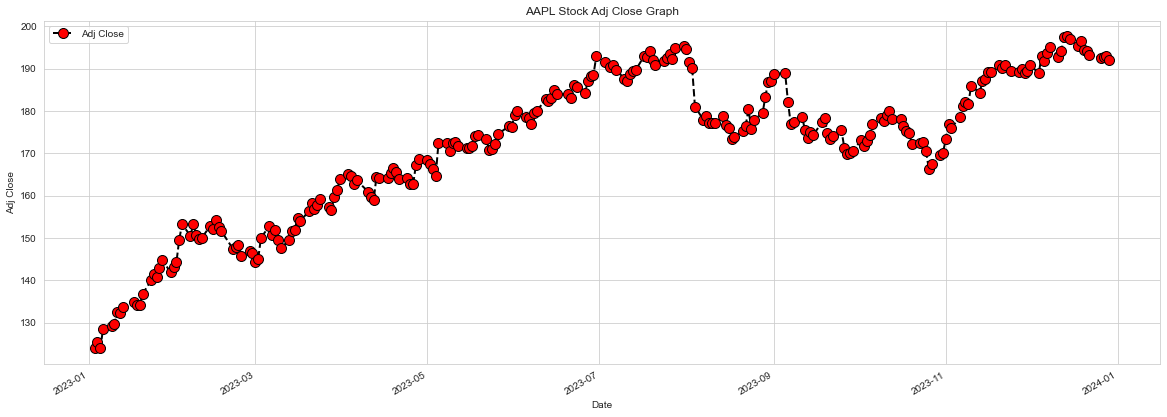

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black',markersize=10,linestyle='dashed',linewidth=2)

plt.title('AAPL Stock Adj Close Graph')

plt.xlabel('Date')

plt.ylabel('Adj Close')

#### clearly we see a rise in the stock as the dates go further

<AxesSubplot:xlabel='Date'>

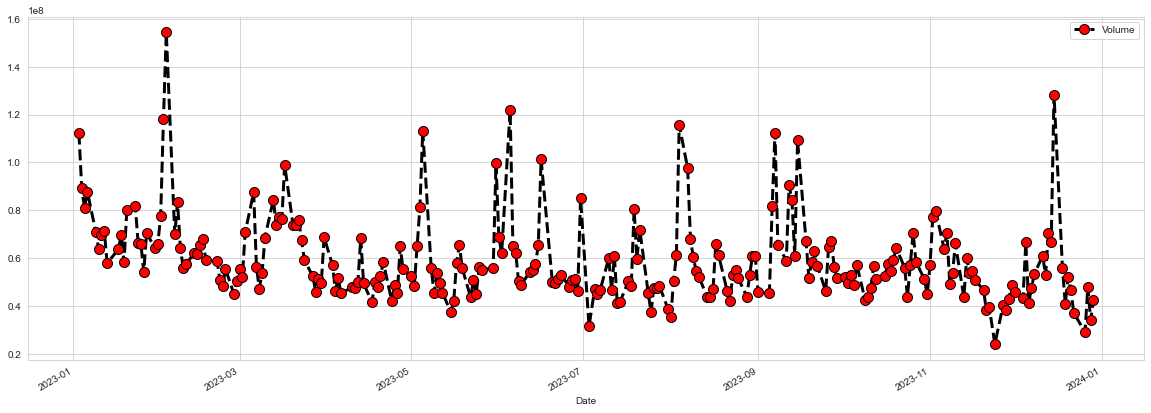

In [10]:
AAPL.Volume.plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black',markersize=10,linestyle='dashed',linewidth=3)


In [11]:
#### now lets make the moving average

ma_days = [10,20,30,40,50]

for i in ma_days:
    column_name = f'MA for {i} days'
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=i).mean()

<AxesSubplot:xlabel='Date'>

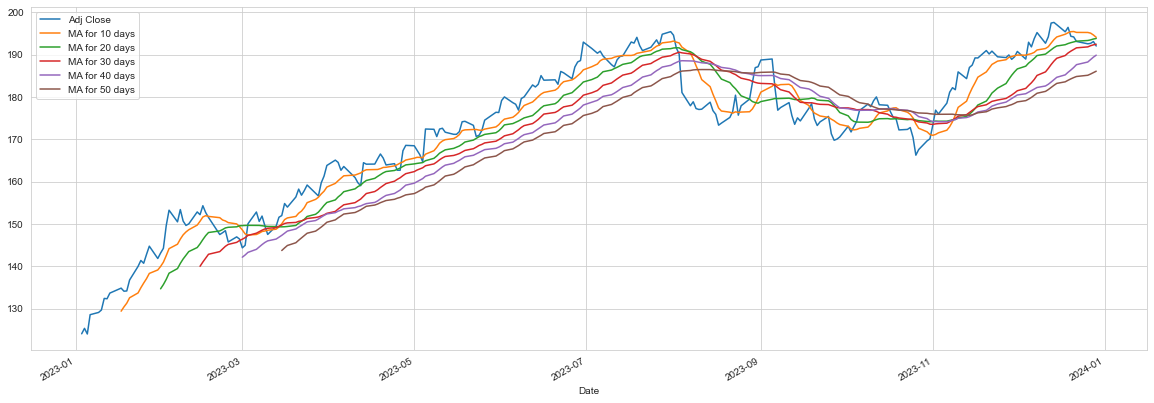

In [12]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 30 days','MA for 40 days','MA for 50 days']].plot(legend=True,figsize=(20,7))

#### moving averages for 10,20,30,40,50 days

In [13]:
#### if you find for loop method complicated then you can also do single column by column like this

AAPL['MA for 60 days'] = AAPL['Adj Close'].rolling(window=60).mean()

In [14]:
AAPL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.048050   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.327507   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.998459   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.560867   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.086533   

               Volume  MA for 10 days  MA for 20 days  MA for 30 days  \
Date                                                                    
2023-01-03  112117500             NaN             NaN             NaN   
2023-01-04   89113600             NaN             NaN             NaN   
2023-01-05   80962700             NaN             NaN             NaN   
2023-01-06   87754700             NaN             NaN             NaN   
2023-01-09   70790800             NaN             NaN             NaN   

            MA for 40 days  MA for 50 days  MA for 60 days  
Date                                                        
2023-01-03             NaN             NaN             NaN  
2023-01-04             NaN             NaN             NaN  
2023-01-05             NaN             NaN             NaN  
2023-01-06             NaN             NaN             NaN  
2023-01-09             NaN             NaN             NaN

<AxesSubplot:xlabel='Date'>

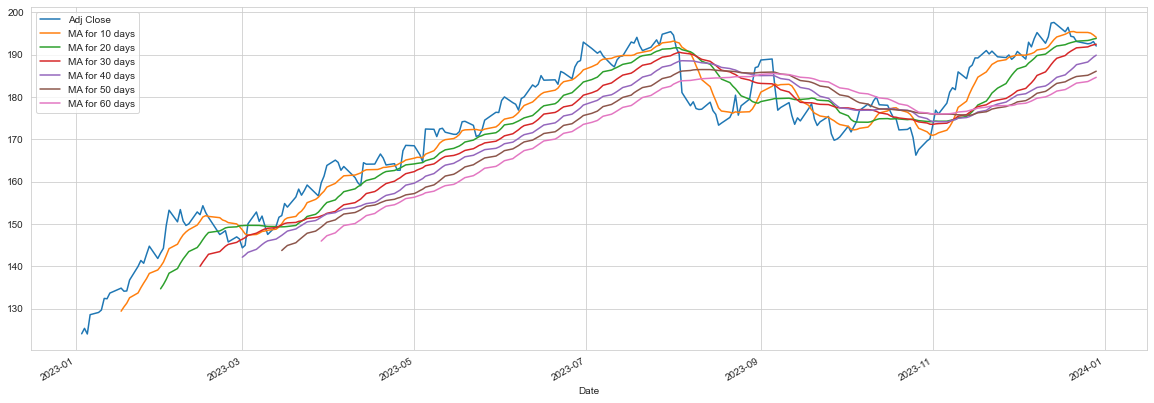

In [15]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 30 days','MA for 40 days','MA for 50 days','MA for 60 days']].plot(legend=True,figsize=(20,7))

#### updated version

In [16]:
#### now we will calculate the percentage change or pct change

AAPL['Daily change'] = AAPL['Adj Close'].pct_change()

In [17]:
AAPL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.048050   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.327507   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.998459   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.560867   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.086533   

               Volume  MA for 10 days  MA for 20 days  MA for 30 days  \
Date                                                                    
2023-01-03  112117500             NaN             NaN             NaN   
2023-01-04   89113600             NaN             NaN             NaN   
2023-01-05   80962700             NaN             NaN             NaN   
2023-01-06   87754700             NaN             NaN             NaN   
2023-01-09   70790800             NaN             NaN             NaN   

            MA for 40 days  MA for 50 days  MA for 60 days  Daily change  
Date                                                                      
2023-01-03             NaN             NaN             NaN           NaN  
2023-01-04             NaN             NaN             NaN      0.010314  
2023-01-05             NaN             NaN             NaN     -0.010605  
2023-01-06             NaN             NaN             NaN      0.036794  
2023-01-09             NaN             NaN             NaN      0.004089

<AxesSubplot:xlabel='Date'>

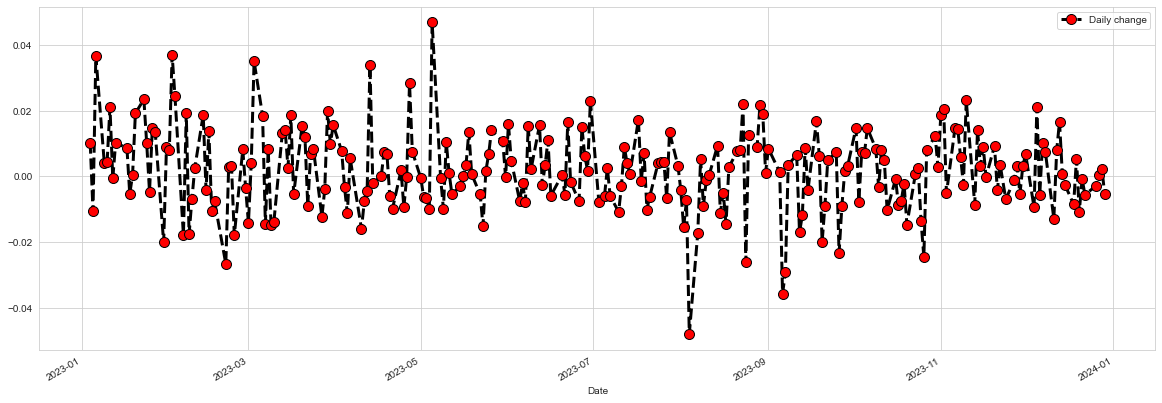

In [18]:
AAPL['Daily change'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black',markersize=10,linestyle='dashed',linewidth=3)

#### this way we can see from the start if the change in stock was profitable or not

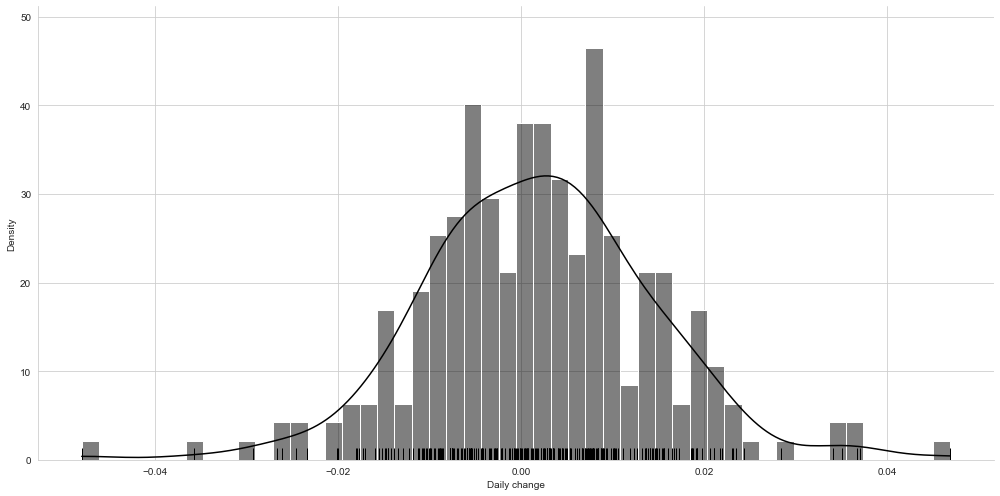

In [19]:
#### now lets make the histogram of the new column we just created, instead of doing simple histogram we can do dist plot

sns.displot(x='Daily change',data=AAPL,rug=True,bins=50,kde=True,aspect=2,height=7,stat='density',color='black')


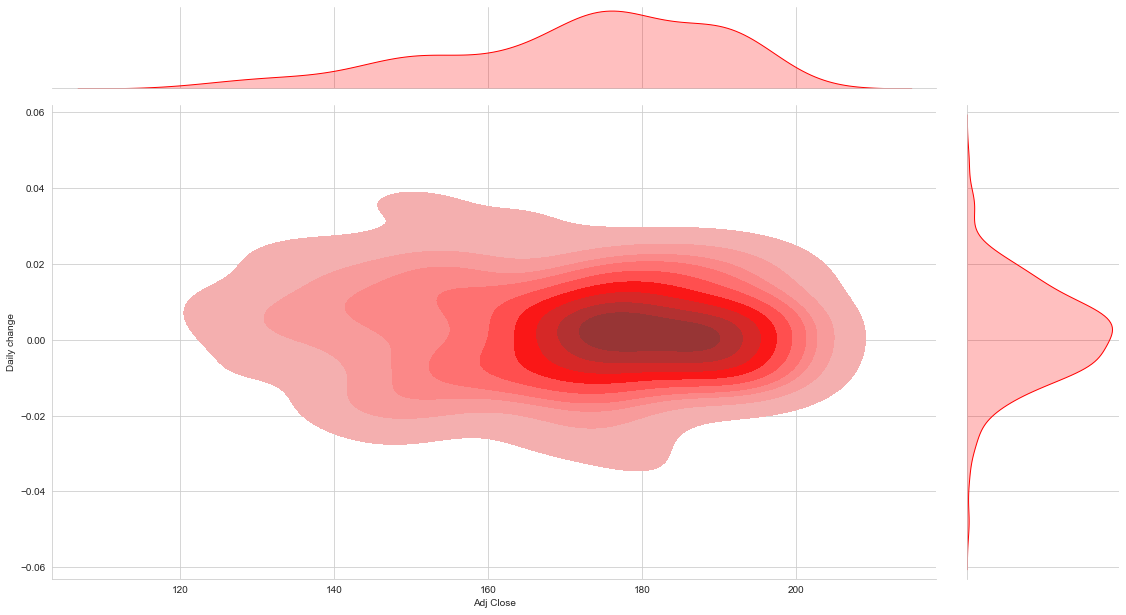

In [20]:
g = sns.jointplot(x='Adj Close',y='Daily change',data=AAPL,kind='kde',fill=True,color='red')

g.fig.set_size_inches(17,9)

#### the density seems to fall under 180 and 0 on y axis which is interesting but also makes sense in long term

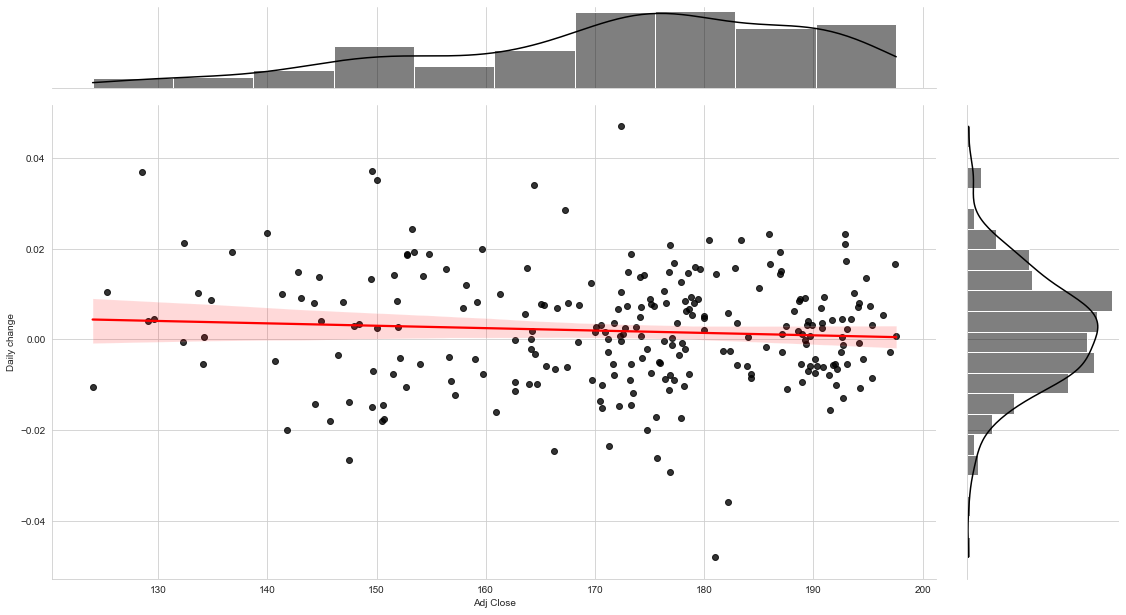

In [21]:
g = sns.jointplot(x='Adj Close',y='Daily change',data=AAPL,kind='reg',color='black',joint_kws={'line_kws':{'color':'red'}})

g.fig.set_size_inches(17,9)

#### we dont see much honestly

In [22]:
AAPL['Daily change'].isnull().any()

True

In [23]:
AAPL['Daily change'] = AAPL['Daily change'].fillna(0)

AAPL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.048050   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.327507   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.998459   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.560867   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.086533   

               Volume  MA for 10 days  MA for 20 days  MA for 30 days  \
Date                                                                    
2023-01-03  112117500             NaN             NaN             NaN   
2023-01-04   89113600             NaN             NaN             NaN   
2023-01-05   80962700             NaN             NaN             NaN   
2023-01-06   87754700             NaN             NaN             NaN   
2023-01-09   70790800             NaN             NaN             NaN   

            MA for 40 days  MA for 50 days  MA for 60 days  Daily change  
Date                                                                      
2023-01-03             NaN             NaN             NaN      0.000000  
2023-01-04             NaN             NaN             NaN      0.010314  
2023-01-05             NaN             NaN             NaN     -0.010605  
2023-01-06             NaN             NaN             NaN      0.036794  
2023-01-09             NaN             NaN             NaN      0.004089

In [24]:
AAPL['Daily change'].isnull().any()

False

In [25]:
from scipy.stats import pearsonr                  #### lets see this with pearsonr

In [26]:
co_eff, p_value = pearsonr(AAPL['Adj Close'],AAPL['Daily change'])

In [27]:
co_eff                              #### bad news

-0.06955892788156896

In [28]:
p_value                             #### definately not correlated

0.273236778127513

In [29]:
closing_df = yf.download(stocks,start='2023-01-01', end='2024-01-01')['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [30]:
#### now we have the all 4 stocks adj closing in one single data frame called closing_df

closing_df.head()

Ticker            AAPL       AMZN       GOOG        MSFT
Date                                                    
2023-01-03  124.048050  85.820000  89.598038  236.609207
2023-01-04  125.327507  85.139999  88.609169  226.259186
2023-01-05  123.998459  83.120003  86.671371  219.553360
2023-01-06  128.560867  86.080002  88.059799  222.140869
2023-01-09  129.086533  87.360001  88.699066  224.303726

In [31]:
return_df = closing_df.pct_change().fillna(0)

In [32]:
#### now we have the return change meaning the percentage of change after closing

return_df.head()

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2023-01-03  0.000000  0.000000  0.000000  0.000000
2023-01-04  0.010314 -0.007924 -0.011037 -0.043743
2023-01-05 -0.010605 -0.023726 -0.021869 -0.029638
2023-01-06  0.036794  0.035611  0.016019  0.011785
2023-01-09  0.004089  0.014870  0.007259  0.009736

Text(0, 0.5, 'Profit Density')

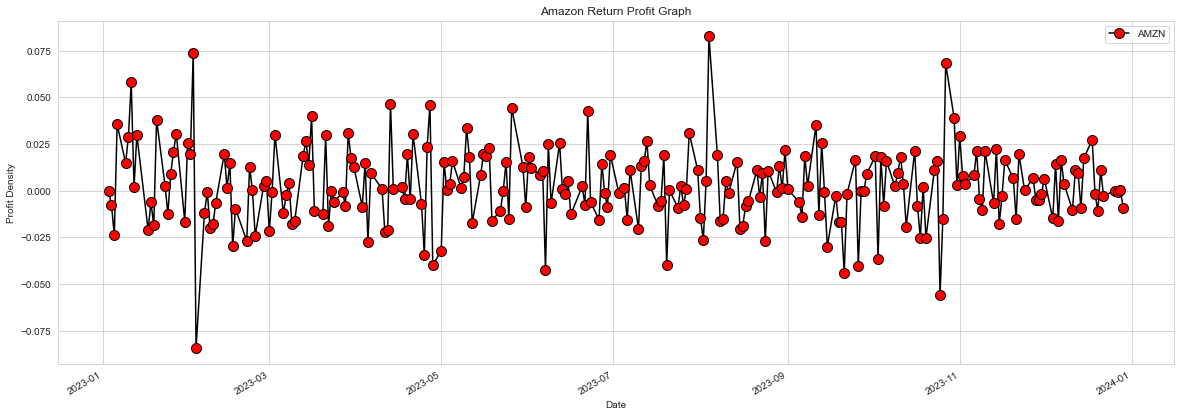

In [33]:
return_df['AMZN'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black',markersize=10)

plt.title('Amazon Return Profit Graph')

plt.xlabel('Date')

plt.ylabel('Profit Density')

#### this is quite interesting, if you invested in AMZN stock at the start of 2023 and withdrew at the start of 2024 you would be in loss
#### now lets see the worst and best days for the amazon stock

In [34]:
return_df[return_df.AMZN == return_df.AMZN.min()]

Ticker        AAPL      AMZN      GOOG      MSFT
Date                                            
2023-02-03  0.0244 -0.084315 -0.032904 -0.023621

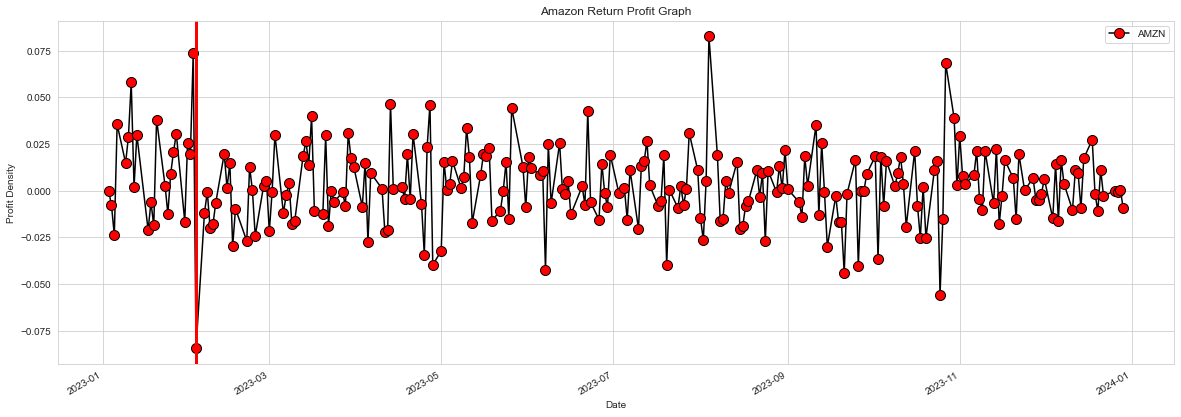

In [35]:
return_df['AMZN'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black',markersize=10)

plt.title('Amazon Return Profit Graph')

plt.xlabel('Date')

plt.ylabel('Profit Density')

plt.axvline(x='2023-02-03',linewidth=3,color='red')

#### the date 2023-02-03 was the worst day for amazon stock

In [36]:
return_df[return_df.AMZN == return_df.AMZN.max()]

Ticker         AAPL      AMZN      GOOG      MSFT
Date                                             
2023-08-04 -0.04802  0.082693 -0.001786  0.003428

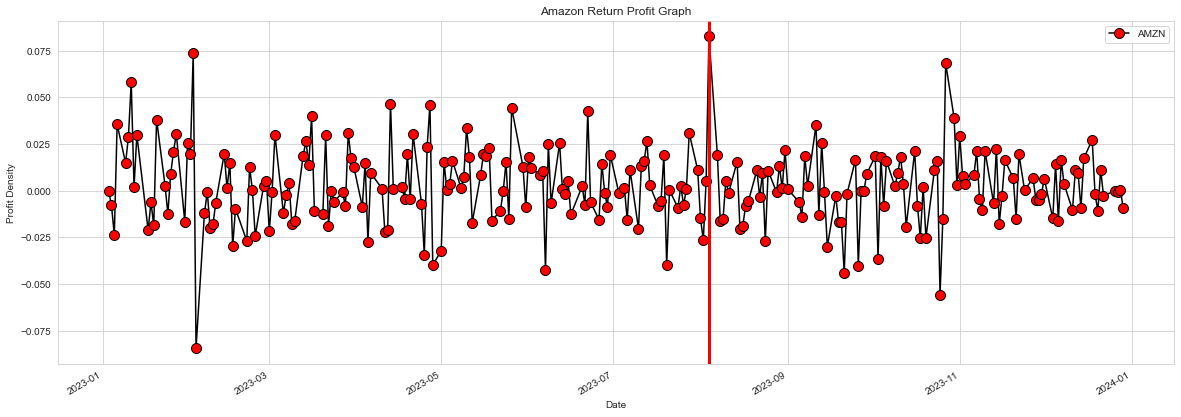

In [37]:
return_df['AMZN'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black',markersize=10)

plt.title('Amazon Return Profit Graph')

plt.xlabel('Date')

plt.ylabel('Profit Density')

plt.axvline(x='2023-08-04',linewidth=3,color='red')

#### the best day being 2023-08-04 for amazon stocks

In [38]:
avg = return_df[['AAPL','AMZN','GOOG','MSFT']].mean()

avg = pd.DataFrame(avg)


In [39]:
avg                      #### it seems like AMZN was the most profitable when it comes down to the mean

0
Ticker          
AAPL    0.001828
AMZN    0.002501
GOOG    0.001994
MSFT    0.001964

Text(0, 0.5, 'Density Mean')

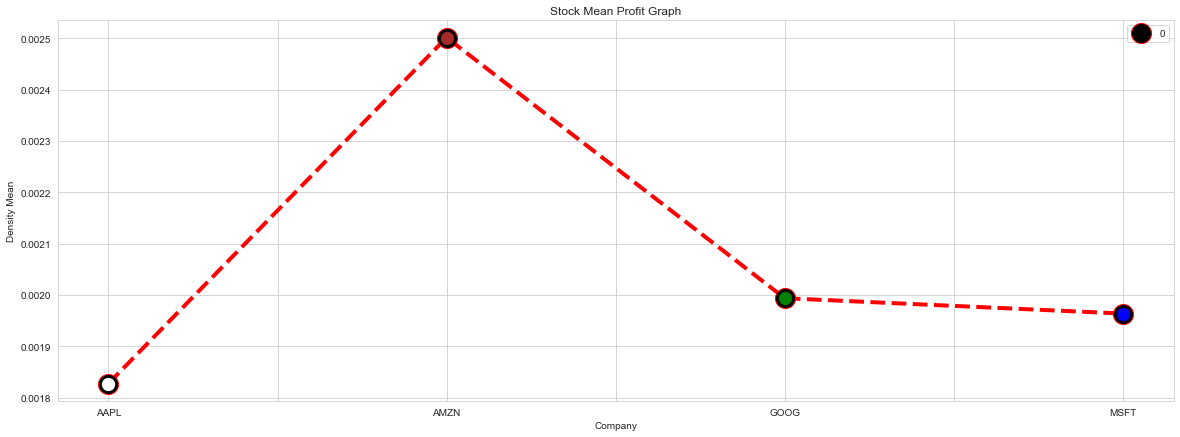

In [40]:
avg.plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',color='red',linestyle='dashed',linewidth=4,markersize=20)

plt.scatter(avg.index[0], avg.iloc[0], color='white', s=150, zorder=5)

plt.scatter(avg.index[1], avg.iloc[1], color='brown', s=150, zorder=5)

plt.scatter(avg.index[2], avg.iloc[2], color='green', s=150, zorder=5)

plt.scatter(avg.index[3], avg.iloc[3], color='blue', s=150, zorder=5)

plt.title('Stock Mean Profit Graph')

plt.xlabel('Company')

plt.ylabel('Density Mean')

#### the least profitable being Apple which is quite shocking to say the least and the most profitable being amazon

In [41]:
std = return_df[['AAPL','AMZN','GOOG','MSFT']].std()

std = pd.DataFrame(std)

std.columns = ['STD']

std


STD
Ticker          
AAPL    0.012545
AMZN    0.020764
GOOG    0.019245
MSFT    0.015793

Text(0, 0.5, 'Density STD')

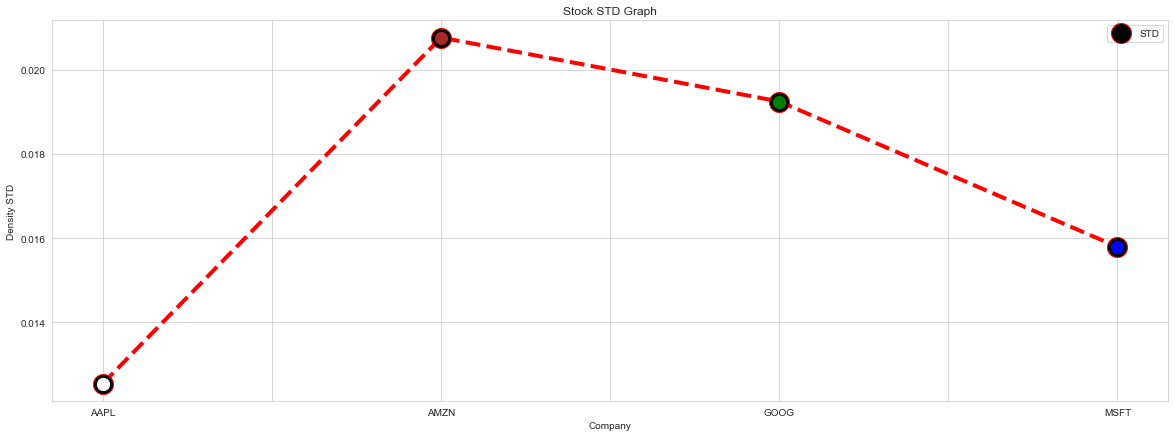

In [42]:
std.plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',color='red',linestyle='dashed',linewidth=4,markersize=20)

plt.scatter(std.index[0], std.iloc[0], color='white', s=150, zorder=5)

plt.scatter(std.index[1], std.iloc[1], color='brown', s=150, zorder=5)

plt.scatter(std.index[2], std.iloc[2], color='green', s=150, zorder=5)

plt.scatter(std.index[3], std.iloc[3], color='blue', s=150, zorder=5)

plt.title('Stock STD Graph')

plt.xlabel('Company')

plt.ylabel('Density STD')

#### ideally you wanna invest in stocks whos STD is low and is safer to invest, although Amazon stock yielded more profit
#### but it has a higher STD making it quite risky to invest
#### apple is most safest stock here


In [43]:
return_df.head()

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2023-01-03  0.000000  0.000000  0.000000  0.000000
2023-01-04  0.010314 -0.007924 -0.011037 -0.043743
2023-01-05 -0.010605 -0.023726 -0.021869 -0.029638
2023-01-06  0.036794  0.035611  0.016019  0.011785
2023-01-09  0.004089  0.014870  0.007259  0.009736

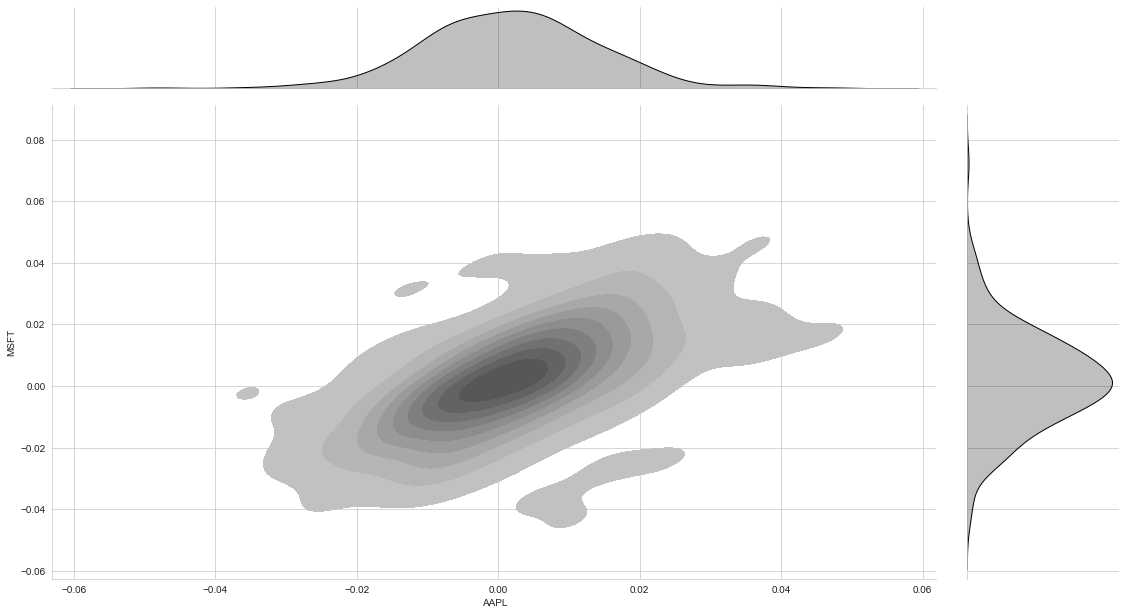

In [44]:
g = sns.jointplot(x='AAPL',y='MSFT',data=return_df,kind='kde',fill=True,color='black')

g.fig.set_size_inches(17,9)

#### interesting

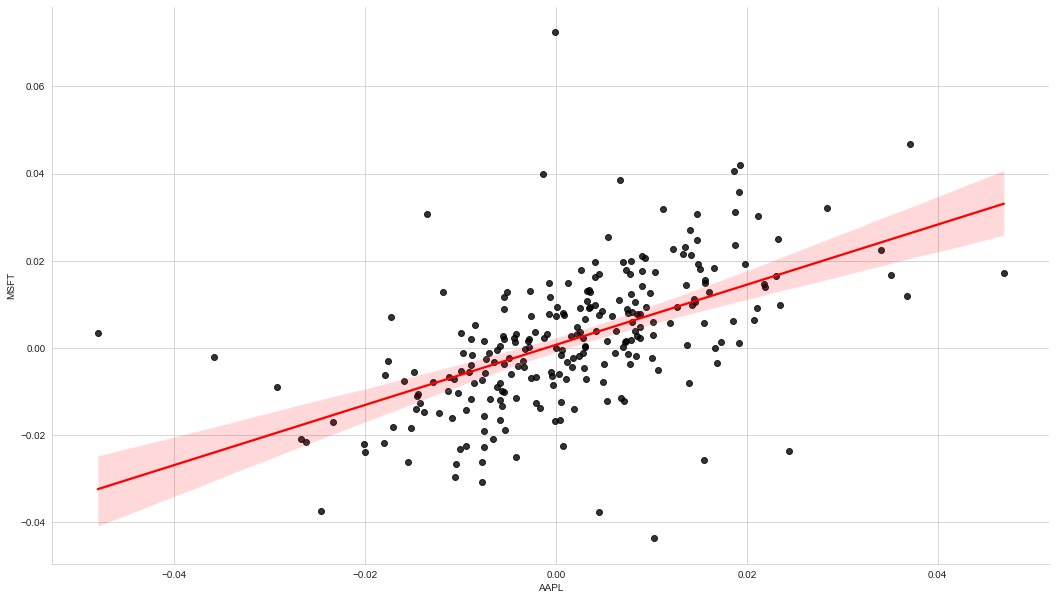

In [45]:
#### lets see if they are corelated with linear regression plot 

g = sns.lmplot(x='AAPL',y='MSFT',data=return_df,scatter_kws={'color':'black'},line_kws={'color':'red'})

g.fig.set_size_inches(17,9)

#### clearly we as the stocks for AAPL goes up, the similar effect takes place to MSFT stocks
#### lets the correlation between them

In [46]:
co_eff,p_value = pearsonr(return_df.AAPL,return_df.MSFT)

co_eff                        #### looking good, definately correlated

0.5480196372575782

In [47]:
p_value                       #### we reject null hypothesis

5.3534105582976516e-21

In [48]:
corr = return_df.corr()

corr

Ticker      AAPL      AMZN      GOOG      MSFT
Ticker                                        
AAPL    1.000000  0.441716  0.536189  0.548020
AMZN    0.441716  1.000000  0.612131  0.575953
GOOG    0.536189  0.612131  1.000000  0.518342
MSFT    0.548020  0.575953  0.518342  1.000000

<AxesSubplot:xlabel='Ticker', ylabel='Ticker'>

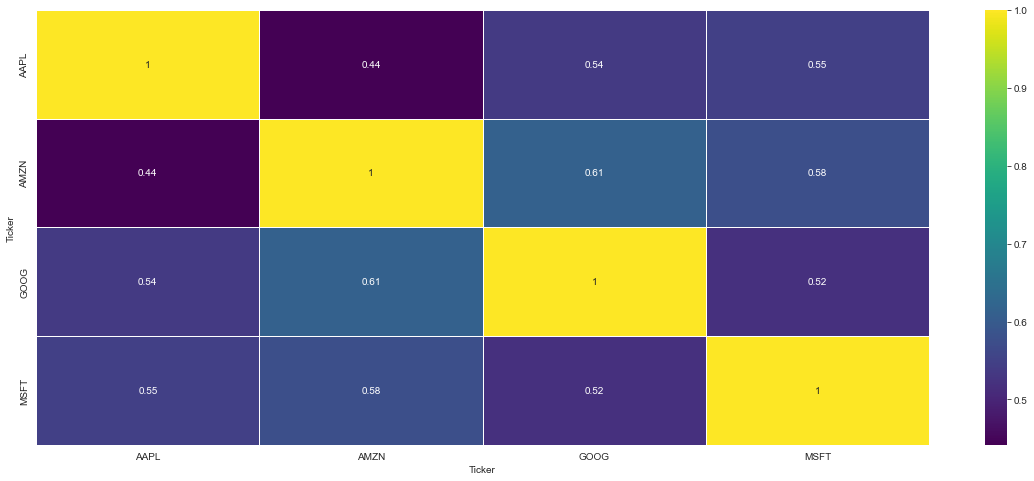

In [49]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(corr,ax=ax,linewidths=0.5,annot=True,cmap='viridis')

#### in short they all are correlated to each to some degree but if you dig deep then you will see which one is highly correlated and which ones are not
#### lets see GOOG, this one we have not given any attention so lets dive deeper on this one
#### GOOG and AMZN stands out here from others

Text(0, 0.5, 'Profit Density')

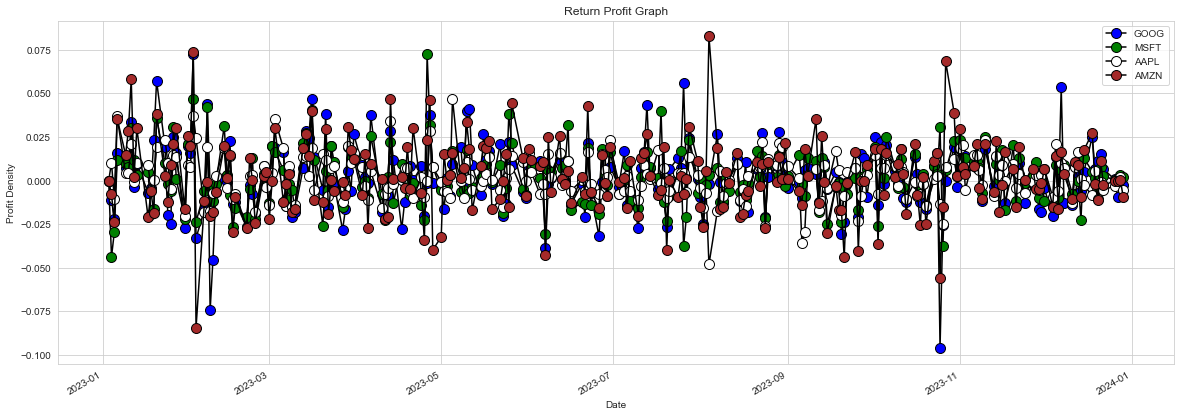

In [50]:
return_df['GOOG'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='blue',color='black',markersize=10)

return_df['MSFT'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='green',color='black',markersize=10)

return_df['AAPL'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='white',color='black',markersize=10)

return_df['AMZN'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='brown',color='black',markersize=10)


plt.title('Return Profit Graph')

plt.xlabel('Date')

plt.ylabel('Profit Density')

#### seems like when one goes down the other one also somehow goes down which is basically a correlation, no wonder they are so closely correlated

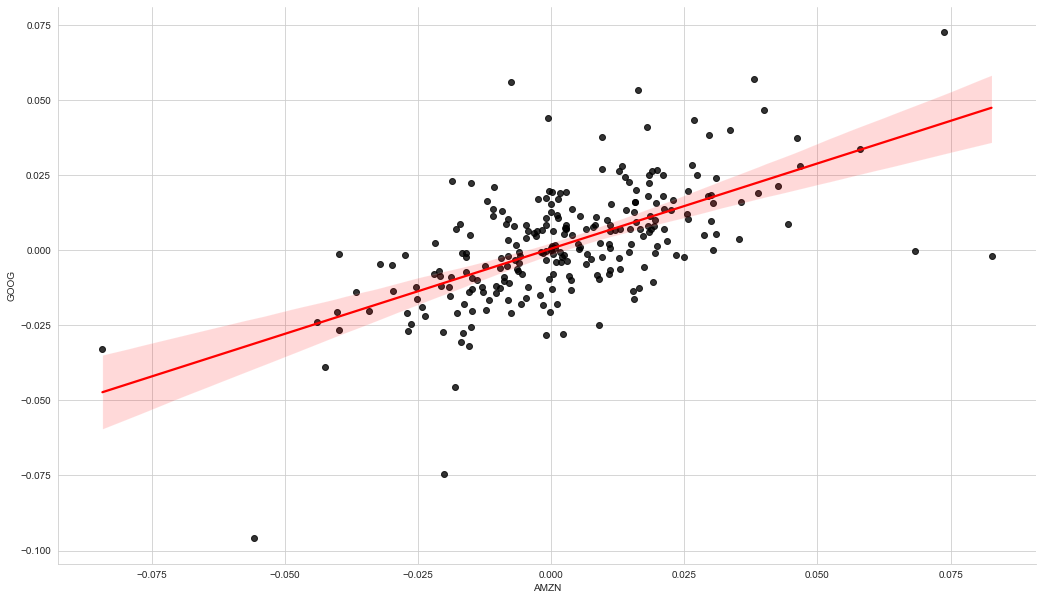

In [51]:
g = sns.lmplot(x='AMZN',y='GOOG',data=return_df,scatter_kws={'color':'black'},line_kws={'color':'red'})

g.fig.set_size_inches(17,9)

#### very much correlated, amazing
#### apart from all the companies in our df, these are the most correlated to each other then any

In [52]:
return_df.head()

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2023-01-03  0.000000  0.000000  0.000000  0.000000
2023-01-04  0.010314 -0.007924 -0.011037 -0.043743
2023-01-05 -0.010605 -0.023726 -0.021869 -0.029638
2023-01-06  0.036794  0.035611  0.016019  0.011785
2023-01-09  0.004089  0.014870  0.007259  0.009736

In [53]:
df = return_df.reset_index()

df

Ticker       Date      AAPL      AMZN      GOOG      MSFT
0      2023-01-03  0.000000  0.000000  0.000000  0.000000
1      2023-01-04  0.010314 -0.007924 -0.011037 -0.043743
2      2023-01-05 -0.010605 -0.023726 -0.021869 -0.029638
3      2023-01-06  0.036794  0.035611  0.016019  0.011785
4      2023-01-09  0.004089  0.014870  0.007259  0.009736
..            ...       ...       ...       ...       ...
245    2023-12-22 -0.005547 -0.002730  0.006488  0.002784
246    2023-12-26 -0.002841 -0.000065  0.000701  0.000214
247    2023-12-27  0.000518 -0.000456 -0.009663 -0.001575
248    2023-12-28  0.002226  0.000261 -0.001131  0.003235
249    2023-12-29 -0.005424 -0.009388 -0.002477  0.002025

[250 rows x 5 columns]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   AAPL    250 non-null    float64       
 2   AMZN    250 non-null    float64       
 3   GOOG    250 non-null    float64       
 4   MSFT    250 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.9 KB


In [55]:
df['month'] = df.Date.apply(lambda x:x.month)

df.month.head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [56]:
df['month_name'] = df.month.map({1:'Jan',
                         2:'Feb',
                         3:'Mar',
                         4:'Apr',
                         5:'May',
                         6:'Jun',
                         7:'Jul',
                         8:'Aug',
                         9:'Sep',
                         10:'Oct',
                         11:'Nov',
                         12:'Dec'})



In [57]:
df['day_of_week'] = df.Date.apply(lambda x:x.dayofweek)

df['Day'] = df.day_of_week.map({0:'Mon',
                                     1:'Tue',
                                     2:'Wed',
                                     3:'Thr',
                                     4:'Fri',
                                     5:'Sat',
                                     6:'Sun'})

df.head()

Ticker       Date      AAPL      AMZN      GOOG      MSFT  month month_name  \
0      2023-01-03  0.000000  0.000000  0.000000  0.000000      1        Jan   
1      2023-01-04  0.010314 -0.007924 -0.011037 -0.043743      1        Jan   
2      2023-01-05 -0.010605 -0.023726 -0.021869 -0.029638      1        Jan   
3      2023-01-06  0.036794  0.035611  0.016019  0.011785      1        Jan   
4      2023-01-09  0.004089  0.014870  0.007259  0.009736      1        Jan   

Ticker  day_of_week  Day  
0                 1  Tue  
1                 2  Wed  
2                 3  Thr  
3                 4  Fri  
4                 0  Mon

In [58]:
df['day'] = df.Date.apply(lambda x:x.day)

df.head()


Ticker       Date      AAPL      AMZN      GOOG      MSFT  month month_name  \
0      2023-01-03  0.000000  0.000000  0.000000  0.000000      1        Jan   
1      2023-01-04  0.010314 -0.007924 -0.011037 -0.043743      1        Jan   
2      2023-01-05 -0.010605 -0.023726 -0.021869 -0.029638      1        Jan   
3      2023-01-06  0.036794  0.035611  0.016019  0.011785      1        Jan   
4      2023-01-09  0.004089  0.014870  0.007259  0.009736      1        Jan   

Ticker  day_of_week  Day  day  
0                 1  Tue    3  
1                 2  Wed    4  
2                 3  Thr    5  
3                 4  Fri    6  
4                 0  Mon    9

In [59]:
heat = df.groupby(['month_name','Day','day'])['AAPL'].sum().unstack().unstack().fillna(0)

heat

day               1                                                 2   \
Day              Fri       Mon       Thr       Tue       Wed       Fri   
month_name                                                               
Apr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Aug         0.000000  0.000000  0.000000 -0.004276  0.000000  0.000000   
Dec         0.006791  0.000000  0.000000  0.000000  0.000000  0.000000   
Feb         0.000000  0.000000  0.000000  0.000000  0.007901  0.000000   
Jan         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jul         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jun         0.000000  0.000000  0.016023  0.000000  0.000000  0.004775   
Mar         0.000000  0.000000  0.000000  0.000000 -0.014246  0.000000   
May         0.000000 -0.000531  0.000000  0.000000  0.000000  0.000000   
Nov         0.000000  0.000000  0.000000  0.000000  0.018739  0.000000   
Oct         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Sep         0.008463  0.000000  0.000000  0.000000  0.000000  0.000000   

day                                                ...        30            \
Day              Mon       Thr       Tue      Wed  ...       Fri       Mon   
month_name                                         ...                       
Apr         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Aug         0.000000  0.000000  0.000000 -0.01549  ...  0.000000  0.000000   
Dec         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Feb         0.000000  0.037063  0.000000  0.00000  ...  0.000000  0.000000   
Jan         0.000000  0.000000  0.000000  0.00000  ...  0.000000 -0.020078   
Jul         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Jun         0.000000  0.000000  0.000000  0.00000  ...  0.023103  0.000000   
Mar         0.000000  0.004129  0.000000  0.00000  ...  0.000000  0.000000   
May         0.000000  0.000000 -0.006191  0.00000  ...  0.000000  0.000000   
Nov         0.000000  0.020693  0.000000  0.00000  ...  0.000000  0.000000   
Oct         0.014836  0.000000  0.000000  0.00000  ...  0.000000  0.012305   
Sep         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   

day                                            31                      \
Day              Thr      Tue       Wed       Fri       Mon       Thr   
month_name                                                              
Apr         0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Aug         0.000000  0.00000  0.019172  0.000000  0.000000  0.001172   
Dec         0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Feb         0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Jan         0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Jul         0.000000  0.00000  0.000000  0.000000  0.003166  0.000000   
Jun         0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Mar         0.009890  0.00000  0.000000  0.015644  0.000000  0.000000   
May         0.000000  0.01066  0.000000  0.000000  0.000000  0.000000   
Nov         0.003063  0.00000  0.000000  0.000000  0.000000  0.000000   
Oct         0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Sep         0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   

day                             
Day              Tue       Wed  
month_name                      
Apr         0.000000  0.000000  
Aug         0.000000  0.000000  
Dec         0.000000  0.000000  
Feb         0.000000  0.000000  
Jan         0.009021  0.000000  
Jul         0.000000  0.000000  
Jun         0.000000  0.000000  
Mar         0.000000  0.000000  
May         0.000000 -0.000282  
Nov         0.000000  0.000000  
Oct         0.002819  0.000000  
Sep         0.000000  0.000000  

[12 rows x 155 columns]

<AxesSubplot:xlabel='day-Day', ylabel='month_name'>

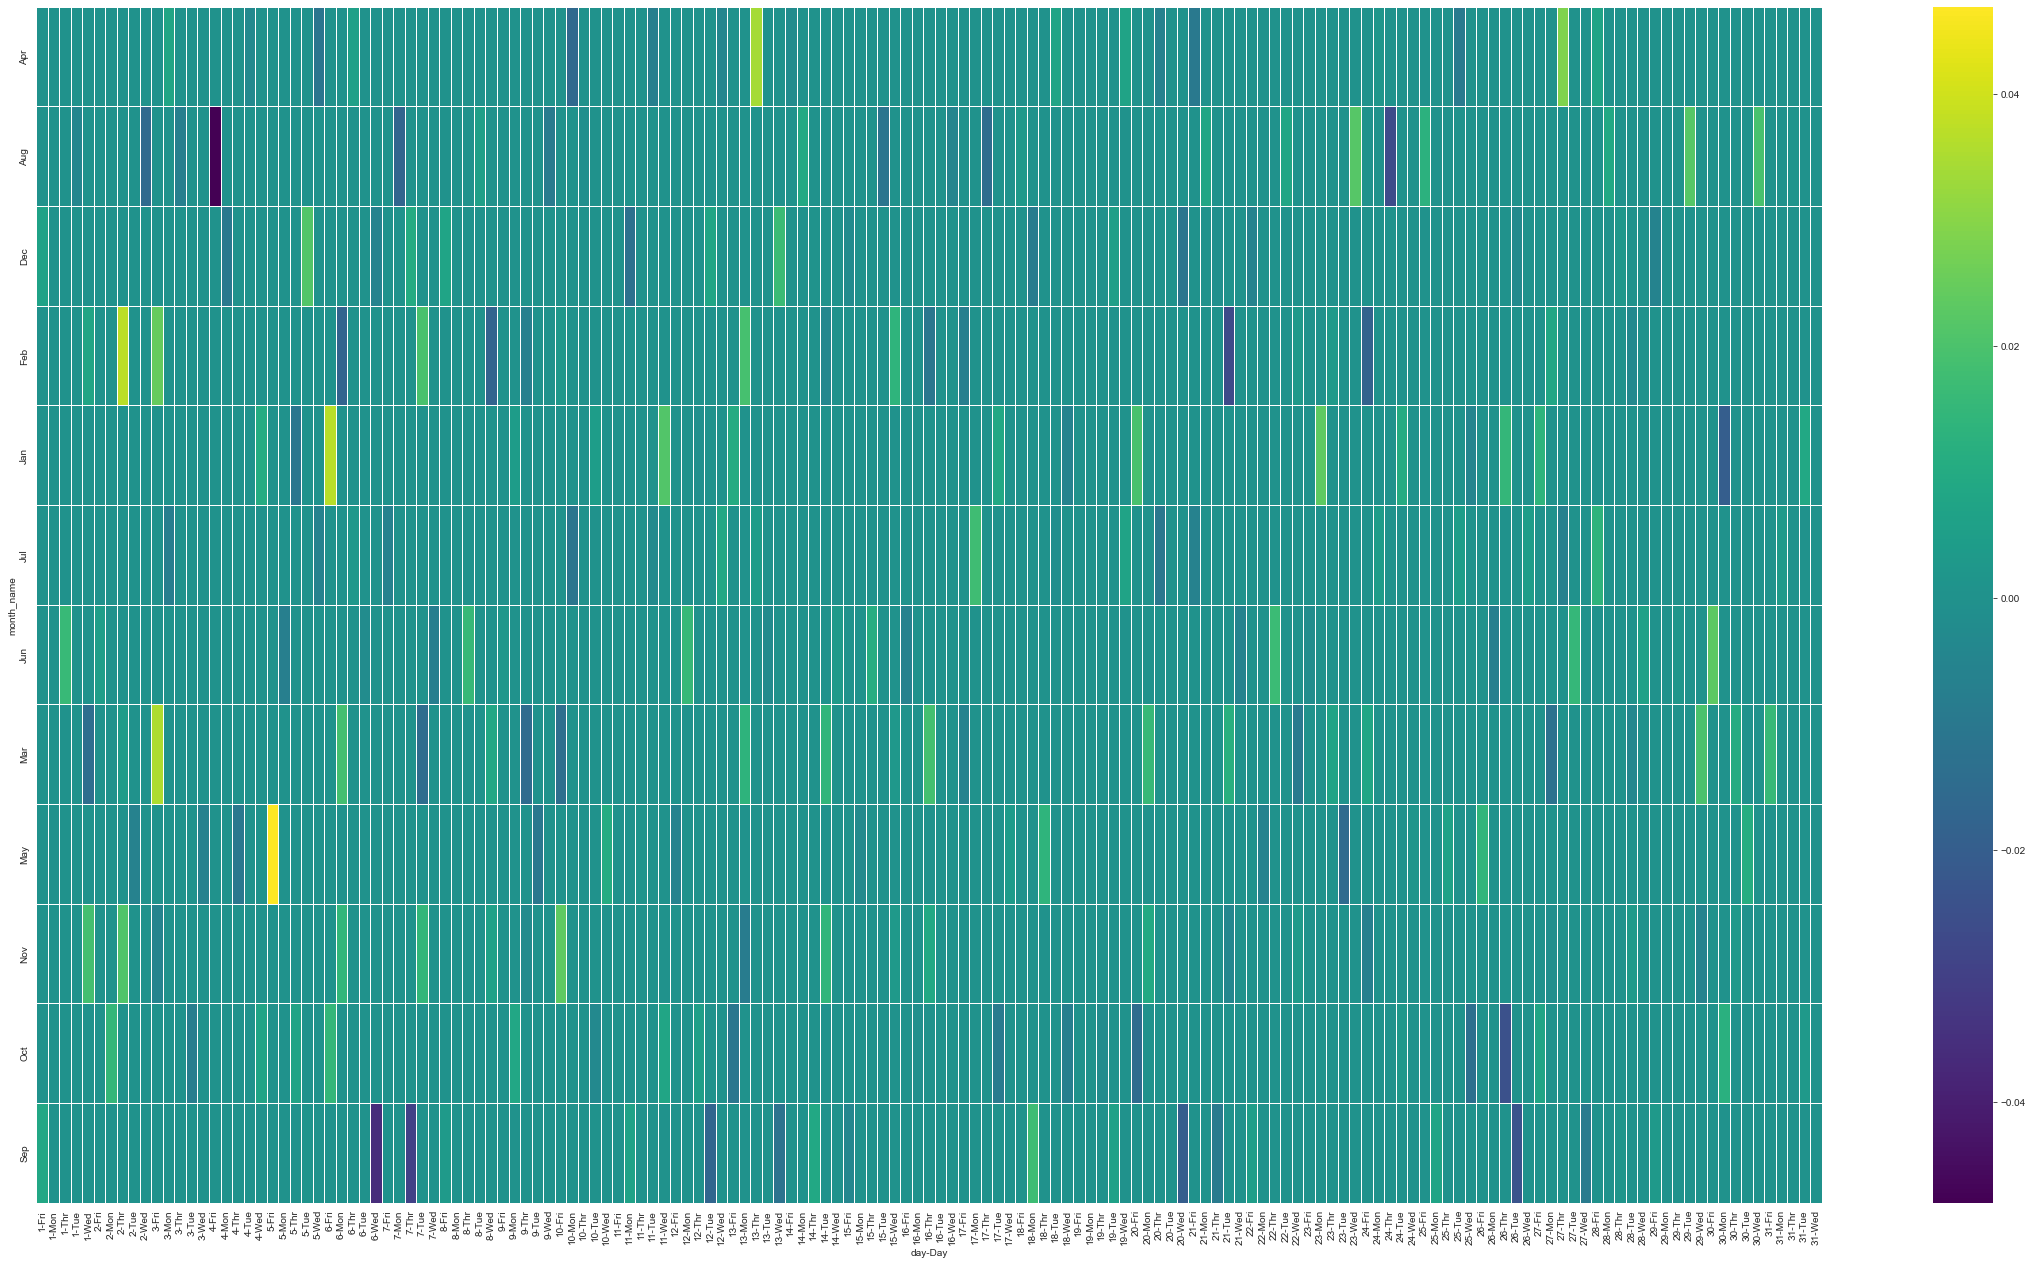

In [60]:
fig, ax = plt.subplots(figsize=(40,22))

sns.heatmap(heat,ax=ax,linewidths=0.5,cmap='viridis')

#### this summarizes the whole Apple stock in one heatmap for one whole year

In [61]:
heat['sum'] = heat.sum(axis=1)             #### we wanna see which months were most profitable 

heat.head()

day                1                                  2                      \
Day              Fri  Mon  Thr       Tue       Wed  Fri  Mon       Thr  Tue   
month_name                                                                    
Apr         0.000000  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0   
Aug         0.000000  0.0  0.0 -0.004276  0.000000  0.0  0.0  0.000000  0.0   
Dec         0.006791  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0   
Feb         0.000000  0.0  0.0  0.000000  0.007901  0.0  0.0  0.037063  0.0   
Jan         0.000000  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0   

day                  ...        30                       31                 \
Day             Wed  ...       Mon  Thr  Tue       Wed  Fri  Mon       Thr   
month_name           ...                                                     
Apr         0.00000  ...  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000   
Aug        -0.01549  ...  0.000000  0.0  0.0  0.019172  0.0  0.0  0.001172   
Dec         0.00000  ...  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000   
Feb         0.00000  ...  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000   
Jan         0.00000  ... -0.020078  0.0  0.0  0.000000  0.0  0.0  0.000000   

day                             sum  
Day              Tue  Wed            
month_name                           
Apr         0.000000  0.0  0.030016  
Aug         0.000000  0.0 -0.040342  
Dec         0.000000  0.0  0.014275  
Feb         0.000000  0.0  0.025381  
Jan         0.009021  0.0  0.145025  

[5 rows x 156 columns]

In [62]:
heat_2 = heat.sort_values(by='sum',ascending=False)

heat_2             #### Jan being the best month for profit while Sep being the worst for AAPL

day                1                                                 2  \
Day              Fri       Mon       Thr       Tue       Wed       Fri   
month_name                                                               
Jan         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Mar         0.000000  0.000000  0.000000  0.000000 -0.014246  0.000000   
Nov         0.000000  0.000000  0.000000  0.000000  0.018739  0.000000   
Jun         0.000000  0.000000  0.016023  0.000000  0.000000  0.004775   
May         0.000000 -0.000531  0.000000  0.000000  0.000000  0.000000   
Apr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Feb         0.000000  0.000000  0.000000  0.000000  0.007901  0.000000   
Dec         0.006791  0.000000  0.000000  0.000000  0.000000  0.000000   
Jul         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Oct         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Aug         0.000000  0.000000  0.000000 -0.004276  0.000000  0.000000   
Sep         0.008463  0.000000  0.000000  0.000000  0.000000  0.000000   

day                                                ...        30            \
Day              Mon       Thr       Tue      Wed  ...       Mon       Thr   
month_name                                         ...                       
Jan         0.000000  0.000000  0.000000  0.00000  ... -0.020078  0.000000   
Mar         0.000000  0.004129  0.000000  0.00000  ...  0.000000  0.009890   
Nov         0.000000  0.020693  0.000000  0.00000  ...  0.000000  0.003063   
Jun         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
May         0.000000  0.000000 -0.006191  0.00000  ...  0.000000  0.000000   
Apr         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Feb         0.000000  0.037063  0.000000  0.00000  ...  0.000000  0.000000   
Dec         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Jul         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Oct         0.014836  0.000000  0.000000  0.00000  ...  0.012305  0.000000   
Aug         0.000000  0.000000  0.000000 -0.01549  ...  0.000000  0.000000   
Sep         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   

day                                  31                                \
Day             Tue       Wed       Fri       Mon       Thr       Tue   
month_name                                                              
Jan         0.00000  0.000000  0.000000  0.000000  0.000000  0.009021   
Mar         0.00000  0.000000  0.015644  0.000000  0.000000  0.000000   
Nov         0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jun         0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
May         0.01066  0.000000  0.000000  0.000000  0.000000  0.000000   
Apr         0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
Feb         0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
Dec         0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jul         0.00000  0.000000  0.000000  0.003166  0.000000  0.000000   
Oct         0.00000  0.000000  0.000000  0.000000  0.000000  0.002819   
Aug         0.00000  0.019172  0.000000  0.000000  0.001172  0.000000   
Sep         0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   

day                        sum  
Day              Wed            
month_name                      
Jan         0.000000  0.145025  
Mar         0.000000  0.114467  
Nov         0.000000  0.108944  
Jun         0.000000  0.091251  
May        -0.000282  0.046719  
Apr         0.000000  0.030016  
Feb         0.000000  0.025381  
Dec         0.000000  0.014275  
Jul         0.000000  0.013275  
Oct         0.000000 -0.001444  
Aug         0.000000 -0.040342  
Sep         0.000000 -0.090672  

[12 rows x 156 columns]

<AxesSubplot:xlabel='day-Day', ylabel='month_name'>

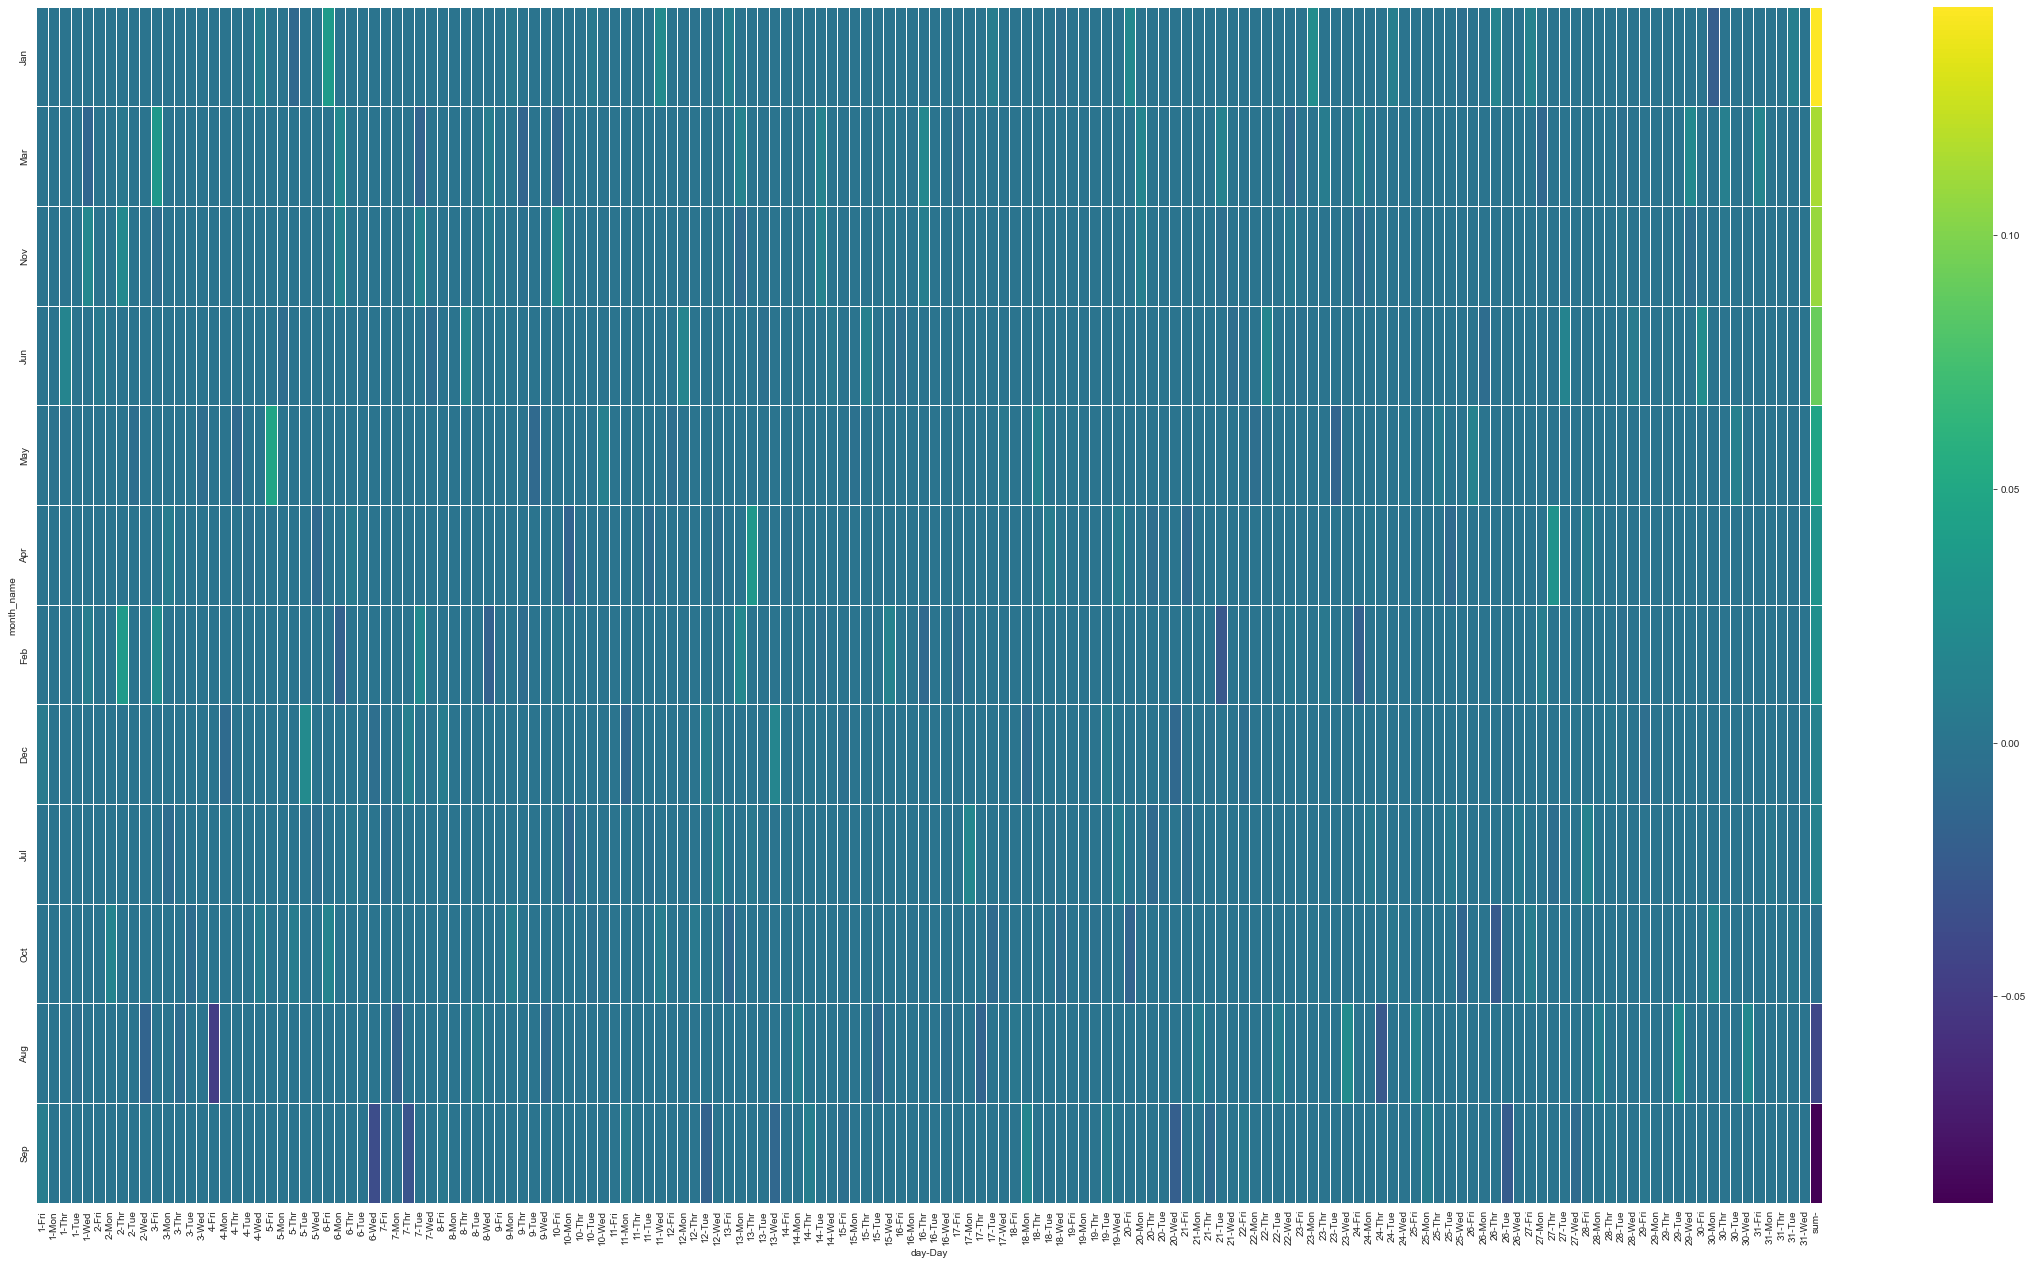

In [63]:
fig, ax = plt.subplots(figsize=(40,22))

sns.heatmap(heat_2,ax=ax,linewidths=0.5,cmap='viridis')

#### same we see inside the heatmap for AAPL

In [64]:
heat = df.groupby(['Day','day'])['AAPL'].sum().unstack().fillna(0)

heat

day        1         2         3         4         5         6         7   \
Day                                                                         
Fri  0.015255  0.004775  0.054309 -0.048020  0.046927  0.051545 -0.005891   
Mon -0.000531  0.014836 -0.000083 -0.009465 -0.007571  0.015216 -0.017254   
Thr  0.016023  0.061885 -0.007322 -0.009913 -0.003407  0.008005 -0.019110   
Tue -0.004276 -0.006191 -0.007770 -0.003250  0.022330 -0.002060  0.019199   
Wed  0.012394 -0.015490 -0.006467  0.017623 -0.017162 -0.041480 -0.007756   

day        8         9         10  ...        22        23        24  \
Day                                ...                                 
Fri  0.010904  0.002160  0.011797  ... -0.000603 -0.001711 -0.016704   
Mon -0.000403  0.012540 -0.026828  ... -0.005481  0.024195  0.006099   
Thr  0.015465 -0.024451 -0.001235  ...  0.016525  0.010260 -0.026171   
Tue  0.005312 -0.009971  0.001104  ...  0.007905 -0.015155  0.012606   
Wed -0.003391 -0.008954  0.010421  ... -0.002693  0.021949  0.001632   

day        25        26        27        28        29        30        31  
Day                                                                        
Fri  0.012643  0.014105  0.021653  0.021049 -0.002378  0.023103  0.015644  
Mon  0.007380 -0.007553 -0.004994  0.008846  0.000000 -0.007773  0.003166  
Thr  0.006692 -0.009802  0.021814  0.003752  0.001797  0.012953  0.001172  
Tue -0.004922 -0.026239  0.015059 -0.004214  0.021810  0.010660  0.011840  
Wed -0.018192  0.004484 -0.008379  0.006328  0.014381  0.019172 -0.000282  

[5 rows x 31 columns]

<AxesSubplot:xlabel='day', ylabel='Day'>

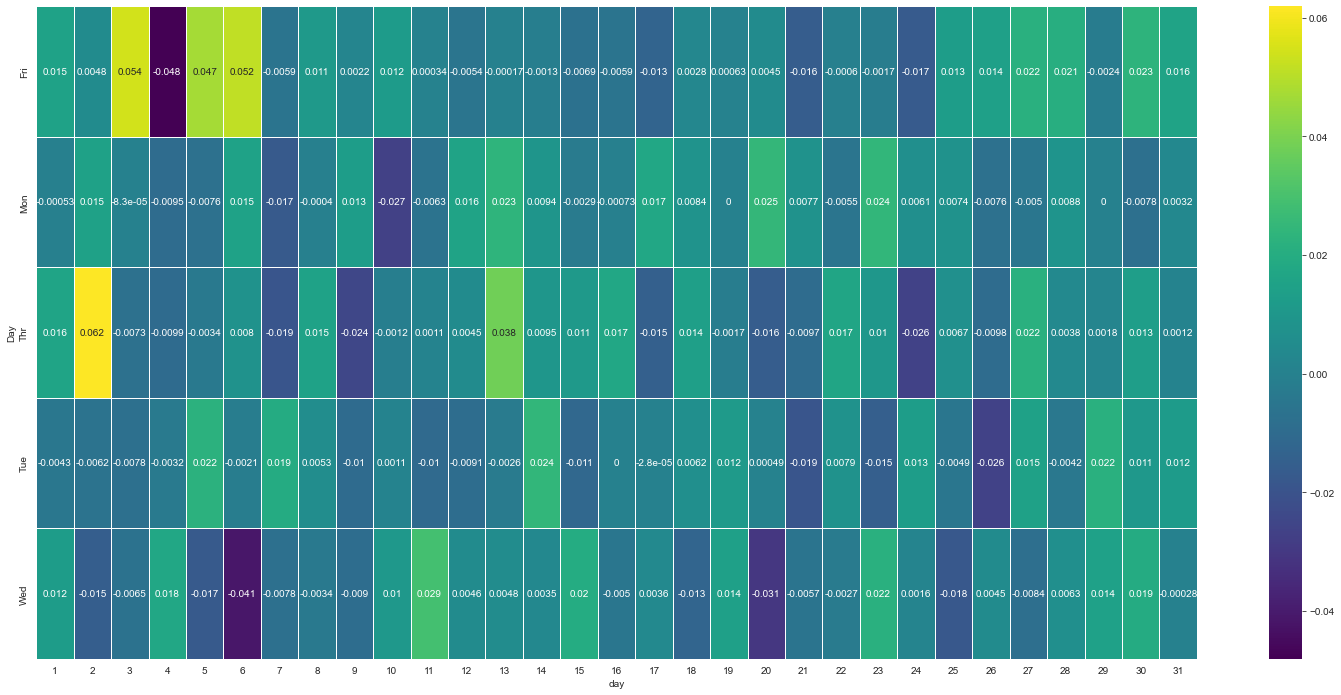

In [65]:
fig, ax = plt.subplots(figsize=(26,12))

sns.heatmap(heat,ax=ax,linewidths=0.5,cmap='viridis',annot=True)

#### seems like friday is doing well but we wanna be sure about it

In [66]:
heat['sum'] = heat.sum(axis=1)             #### we wanna see which days were most profitable 

heat

day         1         2         3         4         5         6         7  \
Day                                                                         
Fri  0.015255  0.004775  0.054309 -0.048020  0.046927  0.051545 -0.005891   
Mon -0.000531  0.014836 -0.000083 -0.009465 -0.007571  0.015216 -0.017254   
Thr  0.016023  0.061885 -0.007322 -0.009913 -0.003407  0.008005 -0.019110   
Tue -0.004276 -0.006191 -0.007770 -0.003250  0.022330 -0.002060  0.019199   
Wed  0.012394 -0.015490 -0.006467  0.017623 -0.017162 -0.041480 -0.007756   

day         8         9        10  ...        23        24        25  \
Day                                ...                                 
Fri  0.010904  0.002160  0.011797  ... -0.001711 -0.016704  0.012643   
Mon -0.000403  0.012540 -0.026828  ...  0.024195  0.006099  0.007380   
Thr  0.015465 -0.024451 -0.001235  ...  0.010260 -0.026171  0.006692   
Tue  0.005312 -0.009971  0.001104  ... -0.015155  0.012606 -0.004922   
Wed -0.003391 -0.008954  0.010421  ...  0.021949  0.001632 -0.018192   

day        26        27        28        29        30        31       sum  
Day                                                                        
Fri  0.014105  0.021653  0.021049 -0.002378  0.023103  0.015644  0.190154  
Mon -0.007553 -0.004994  0.008846  0.000000 -0.007773  0.003166  0.101270  
Thr -0.009802  0.021814  0.003752  0.001797  0.012953  0.001172  0.128488  
Tue -0.026239  0.015059 -0.004214  0.021810  0.010660  0.011840  0.033769  
Wed  0.004484 -0.008379  0.006328  0.014381  0.019172 -0.000282  0.003216  

[5 rows x 32 columns]

In [67]:
heat_2 = heat.sort_values(by='sum',ascending=False)

heat_2

day         1         2         3         4         5         6         7  \
Day                                                                         
Fri  0.015255  0.004775  0.054309 -0.048020  0.046927  0.051545 -0.005891   
Thr  0.016023  0.061885 -0.007322 -0.009913 -0.003407  0.008005 -0.019110   
Mon -0.000531  0.014836 -0.000083 -0.009465 -0.007571  0.015216 -0.017254   
Tue -0.004276 -0.006191 -0.007770 -0.003250  0.022330 -0.002060  0.019199   
Wed  0.012394 -0.015490 -0.006467  0.017623 -0.017162 -0.041480 -0.007756   

day         8         9        10  ...        23        24        25  \
Day                                ...                                 
Fri  0.010904  0.002160  0.011797  ... -0.001711 -0.016704  0.012643   
Thr  0.015465 -0.024451 -0.001235  ...  0.010260 -0.026171  0.006692   
Mon -0.000403  0.012540 -0.026828  ...  0.024195  0.006099  0.007380   
Tue  0.005312 -0.009971  0.001104  ... -0.015155  0.012606 -0.004922   
Wed -0.003391 -0.008954  0.010421  ...  0.021949  0.001632 -0.018192   

day        26        27        28        29        30        31       sum  
Day                                                                        
Fri  0.014105  0.021653  0.021049 -0.002378  0.023103  0.015644  0.190154  
Thr -0.009802  0.021814  0.003752  0.001797  0.012953  0.001172  0.128488  
Mon -0.007553 -0.004994  0.008846  0.000000 -0.007773  0.003166  0.101270  
Tue -0.026239  0.015059 -0.004214  0.021810  0.010660  0.011840  0.033769  
Wed  0.004484 -0.008379  0.006328  0.014381  0.019172 -0.000282  0.003216  

[5 rows x 32 columns]

<AxesSubplot:xlabel='day', ylabel='Day'>

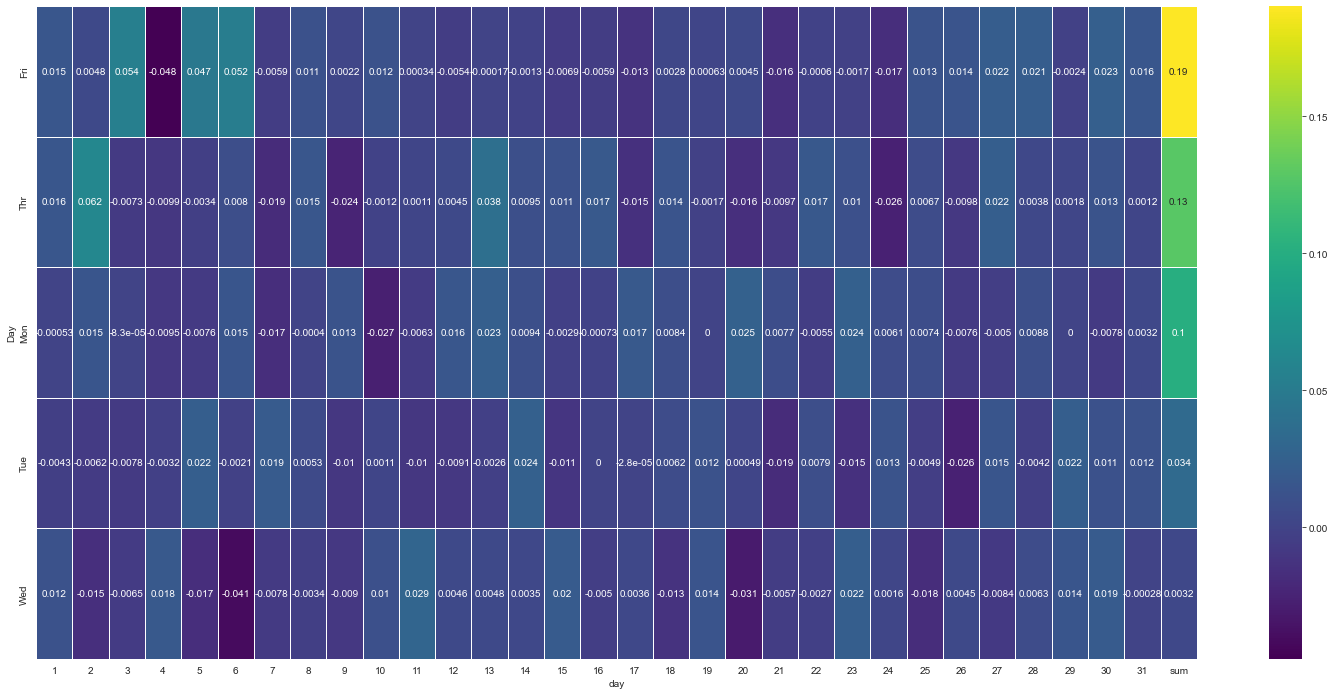

In [68]:
fig, ax = plt.subplots(figsize=(26,12))

sns.heatmap(heat_2,ax=ax,linewidths=0.5,cmap='viridis',annot=True)

#### the most profitable day being Friday and worst being Wednesday for AAPL stocks

In [69]:
heat = df.groupby(['month_name','Day','day'])['GOOG'].sum().unstack().unstack().fillna(0)

heat        #### similar treatment to Google stocks

day               1                                                 2   \
Day              Fri       Mon       Thr       Tue       Wed       Fri   
month_name                                                               
Apr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Aug         0.000000  0.000000  0.000000 -0.009165  0.000000  0.000000   
Dec        -0.004480  0.000000  0.000000  0.000000  0.000000  0.000000   
Feb         0.000000  0.000000  0.000000  0.000000  0.015620  0.000000   
Jan         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jul         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jun         0.000000  0.000000  0.008106  0.000000  0.000000  0.006915   
Mar         0.000000  0.000000  0.000000  0.000000  0.002326  0.000000   
May         0.000000 -0.004713  0.000000  0.000000  0.000000  0.000000   
Nov         0.000000  0.000000  0.000000  0.000000  0.018117  0.000000   
Oct         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Sep        -0.004004  0.000000  0.000000  0.000000  0.000000  0.000000   

day                                                ...        30            \
Day             Mon       Thr       Tue       Wed  ...       Fri       Mon   
month_name                                         ...                       
Apr         0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
Aug         0.00000  0.000000  0.000000 -0.024642  ...  0.000000  0.000000   
Dec         0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
Feb         0.00000  0.072661  0.000000  0.000000  ...  0.000000  0.000000   
Jan         0.00000  0.000000  0.000000  0.000000  ...  0.000000 -0.027405   
Jul         0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
Jun         0.00000  0.000000  0.000000  0.000000  ...  0.007999  0.000000   
Mar         0.00000  0.019887  0.000000  0.000000  ...  0.000000  0.000000   
May         0.00000  0.000000 -0.016062  0.000000  ...  0.000000  0.000000   
Nov         0.00000  0.007917  0.000000  0.000000  ...  0.000000  0.000000   
Oct         0.02518  0.000000  0.000000  0.000000  ...  0.000000  0.019044   
Sep         0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

day                                             31                      \
Day              Thr       Tue       Wed       Fri       Mon       Thr   
month_name                                                               
Apr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Aug         0.000000  0.000000  0.010628  0.000000  0.000000  0.003067   
Dec         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Feb         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jan         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jul         0.000000  0.000000  0.000000  0.000000  0.000752  0.000000   
Jun         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Mar        -0.005692  0.000000  0.000000  0.026451  0.000000  0.000000   
May         0.000000 -0.006298  0.000000  0.000000  0.000000  0.000000   
Nov        -0.018182  0.000000  0.000000  0.000000  0.000000  0.000000   
Oct         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Sep         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

day                             
Day              Tue       Wed  
month_name                      
Apr         0.000000  0.000000  
Aug         0.000000  0.000000  
Dec         0.000000  0.000000  
Feb         0.000000  0.000000  
Jan         0.019602  0.000000  
Jul         0.000000  0.000000  
Jun         0.000000  0.000000  
Mar         0.000000  0.000000  
May         0.000000 -0.010189  
Nov         0.000000  0.000000  
Oct        -0.003579  0.000000  
Sep         0.000000  0.000000  

[12 rows x 155 columns]

<AxesSubplot:xlabel='day-Day', ylabel='month_name'>

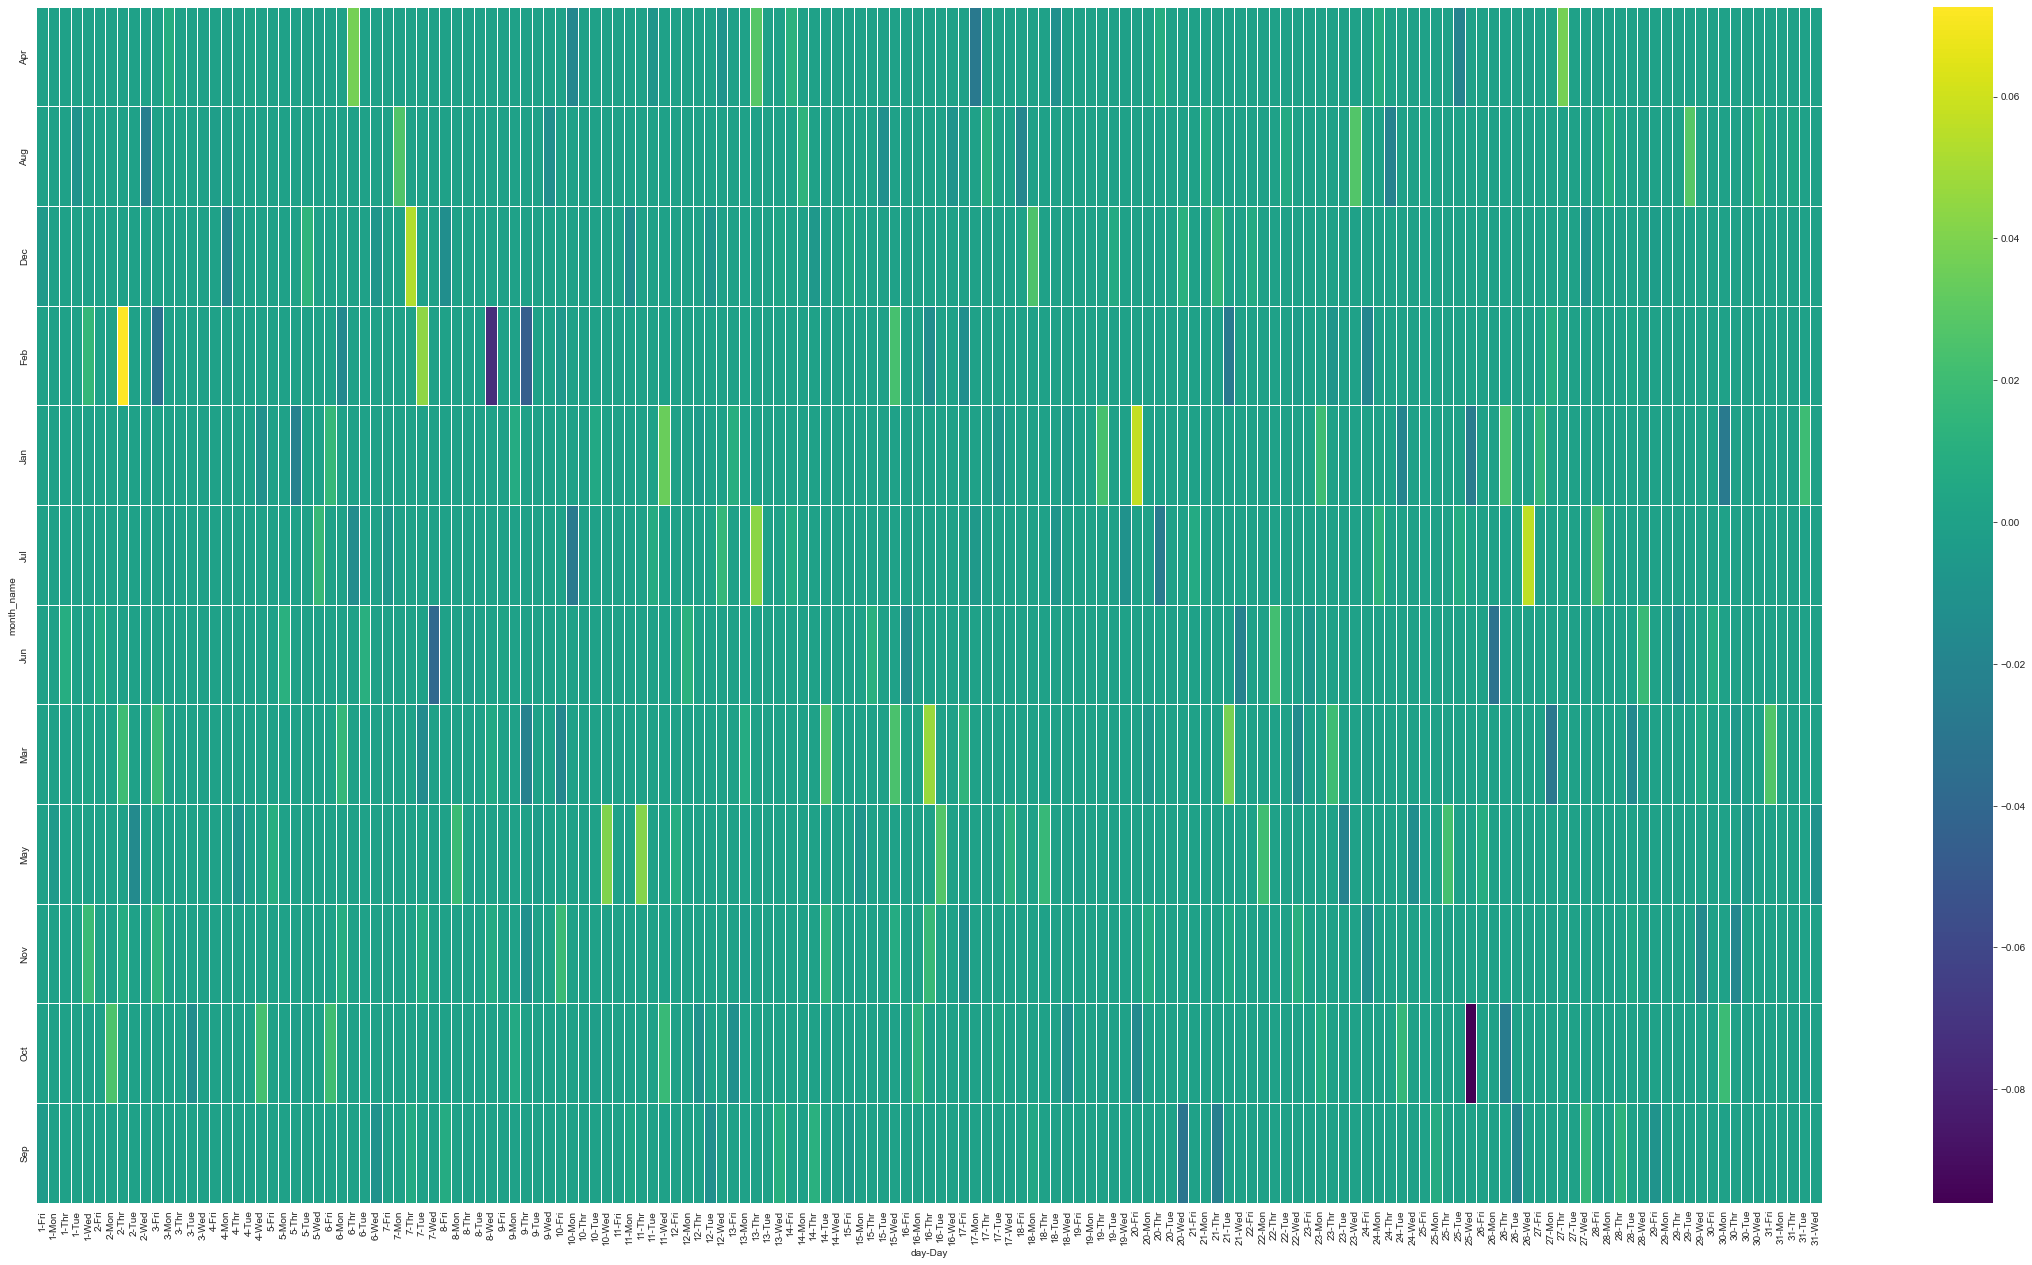

In [70]:
fig, ax = plt.subplots(figsize=(40,22))

sns.heatmap(heat,ax=ax,linewidths=0.5,cmap='viridis')

#### this summarizes the whole Apple stock in one heatmap for one whole year

In [71]:
heat['sum'] = heat.sum(axis=1)             #### we wanna see which months were most profitable 

heat.head()

day               1                                 2                      \
Day             Fri  Mon  Thr       Tue      Wed  Fri  Mon       Thr  Tue   
month_name                                                                  
Apr         0.00000  0.0  0.0  0.000000  0.00000  0.0  0.0  0.000000  0.0   
Aug         0.00000  0.0  0.0 -0.009165  0.00000  0.0  0.0  0.000000  0.0   
Dec        -0.00448  0.0  0.0  0.000000  0.00000  0.0  0.0  0.000000  0.0   
Feb         0.00000  0.0  0.0  0.000000  0.01562  0.0  0.0  0.072661  0.0   
Jan         0.00000  0.0  0.0  0.000000  0.00000  0.0  0.0  0.000000  0.0   

day                   ...        30                       31                 \
Day              Wed  ...       Mon  Thr  Tue       Wed  Fri  Mon       Thr   
month_name            ...                                                     
Apr         0.000000  ...  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000   
Aug        -0.024642  ...  0.000000  0.0  0.0  0.010628  0.0  0.0  0.003067   
Dec         0.000000  ...  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000   
Feb         0.000000  ...  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000   
Jan         0.000000  ... -0.027405  0.0  0.0  0.000000  0.0  0.0  0.000000   

day                             sum  
Day              Tue  Wed            
month_name                           
Apr         0.000000  0.0  0.042631  
Aug         0.000000  0.0  0.033653  
Dec         0.000000  0.0  0.053563  
Feb         0.000000  0.0 -0.091409  
Jan         0.019602  0.0  0.112060  

[5 rows x 156 columns]

In [72]:
heat_2 = heat.sort_values(by='sum',ascending=False)

heat_2             #### April being the best month for profit while Feb being the worst for GOOG

day                1                                                 2  \
Day              Fri       Mon       Thr       Tue       Wed       Fri   
month_name                                                               
Mar         0.000000  0.000000  0.000000  0.000000  0.002326  0.000000   
May         0.000000 -0.004713  0.000000  0.000000  0.000000  0.000000   
Jan         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jul         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Nov         0.000000  0.000000  0.000000  0.000000  0.018117  0.000000   
Dec        -0.004480  0.000000  0.000000  0.000000  0.000000  0.000000   
Apr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Aug         0.000000  0.000000  0.000000 -0.009165  0.000000  0.000000   
Jun         0.000000  0.000000  0.008106  0.000000  0.000000  0.006915   
Sep        -0.004004  0.000000  0.000000  0.000000  0.000000  0.000000   
Oct         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Feb         0.000000  0.000000  0.000000  0.000000  0.015620  0.000000   

day                                                ...        30            \
Day             Mon       Thr       Tue       Wed  ...       Mon       Thr   
month_name                                         ...                       
Mar         0.00000  0.019887  0.000000  0.000000  ...  0.000000 -0.005692   
May         0.00000  0.000000 -0.016062  0.000000  ...  0.000000  0.000000   
Jan         0.00000  0.000000  0.000000  0.000000  ... -0.027405  0.000000   
Jul         0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
Nov         0.00000  0.007917  0.000000  0.000000  ...  0.000000 -0.018182   
Dec         0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
Apr         0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
Aug         0.00000  0.000000  0.000000 -0.024642  ...  0.000000  0.000000   
Jun         0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
Sep         0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
Oct         0.02518  0.000000  0.000000  0.000000  ...  0.019044  0.000000   
Feb         0.00000  0.072661  0.000000  0.000000  ...  0.000000  0.000000   

day                                   31                                \
Day              Tue       Wed       Fri       Mon       Thr       Tue   
month_name                                                               
Mar         0.000000  0.000000  0.026451  0.000000  0.000000  0.000000   
May        -0.006298  0.000000  0.000000  0.000000  0.000000  0.000000   
Jan         0.000000  0.000000  0.000000  0.000000  0.000000  0.019602   
Jul         0.000000  0.000000  0.000000  0.000752  0.000000  0.000000   
Nov         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Dec         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Apr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Aug         0.000000  0.010628  0.000000  0.000000  0.003067  0.000000   
Jun         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Sep         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Oct         0.000000  0.000000  0.000000  0.000000  0.000000 -0.003579   
Feb         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

day                        sum  
Day              Wed            
month_name                      
Mar         0.000000  0.146091  
May        -0.010189  0.134553  
Jan         0.000000  0.112060  
Jul         0.000000  0.099770  
Nov         0.000000  0.067953  
Dec         0.000000  0.053563  
Apr         0.000000  0.042631  
Aug         0.000000  0.033653  
Jun         0.000000 -0.017248  
Sep         0.000000 -0.039292  
Oct         0.000000 -0.043884  
Feb         0.000000 -0.091409  

[12 rows x 156 columns]

<AxesSubplot:xlabel='day-Day', ylabel='month_name'>

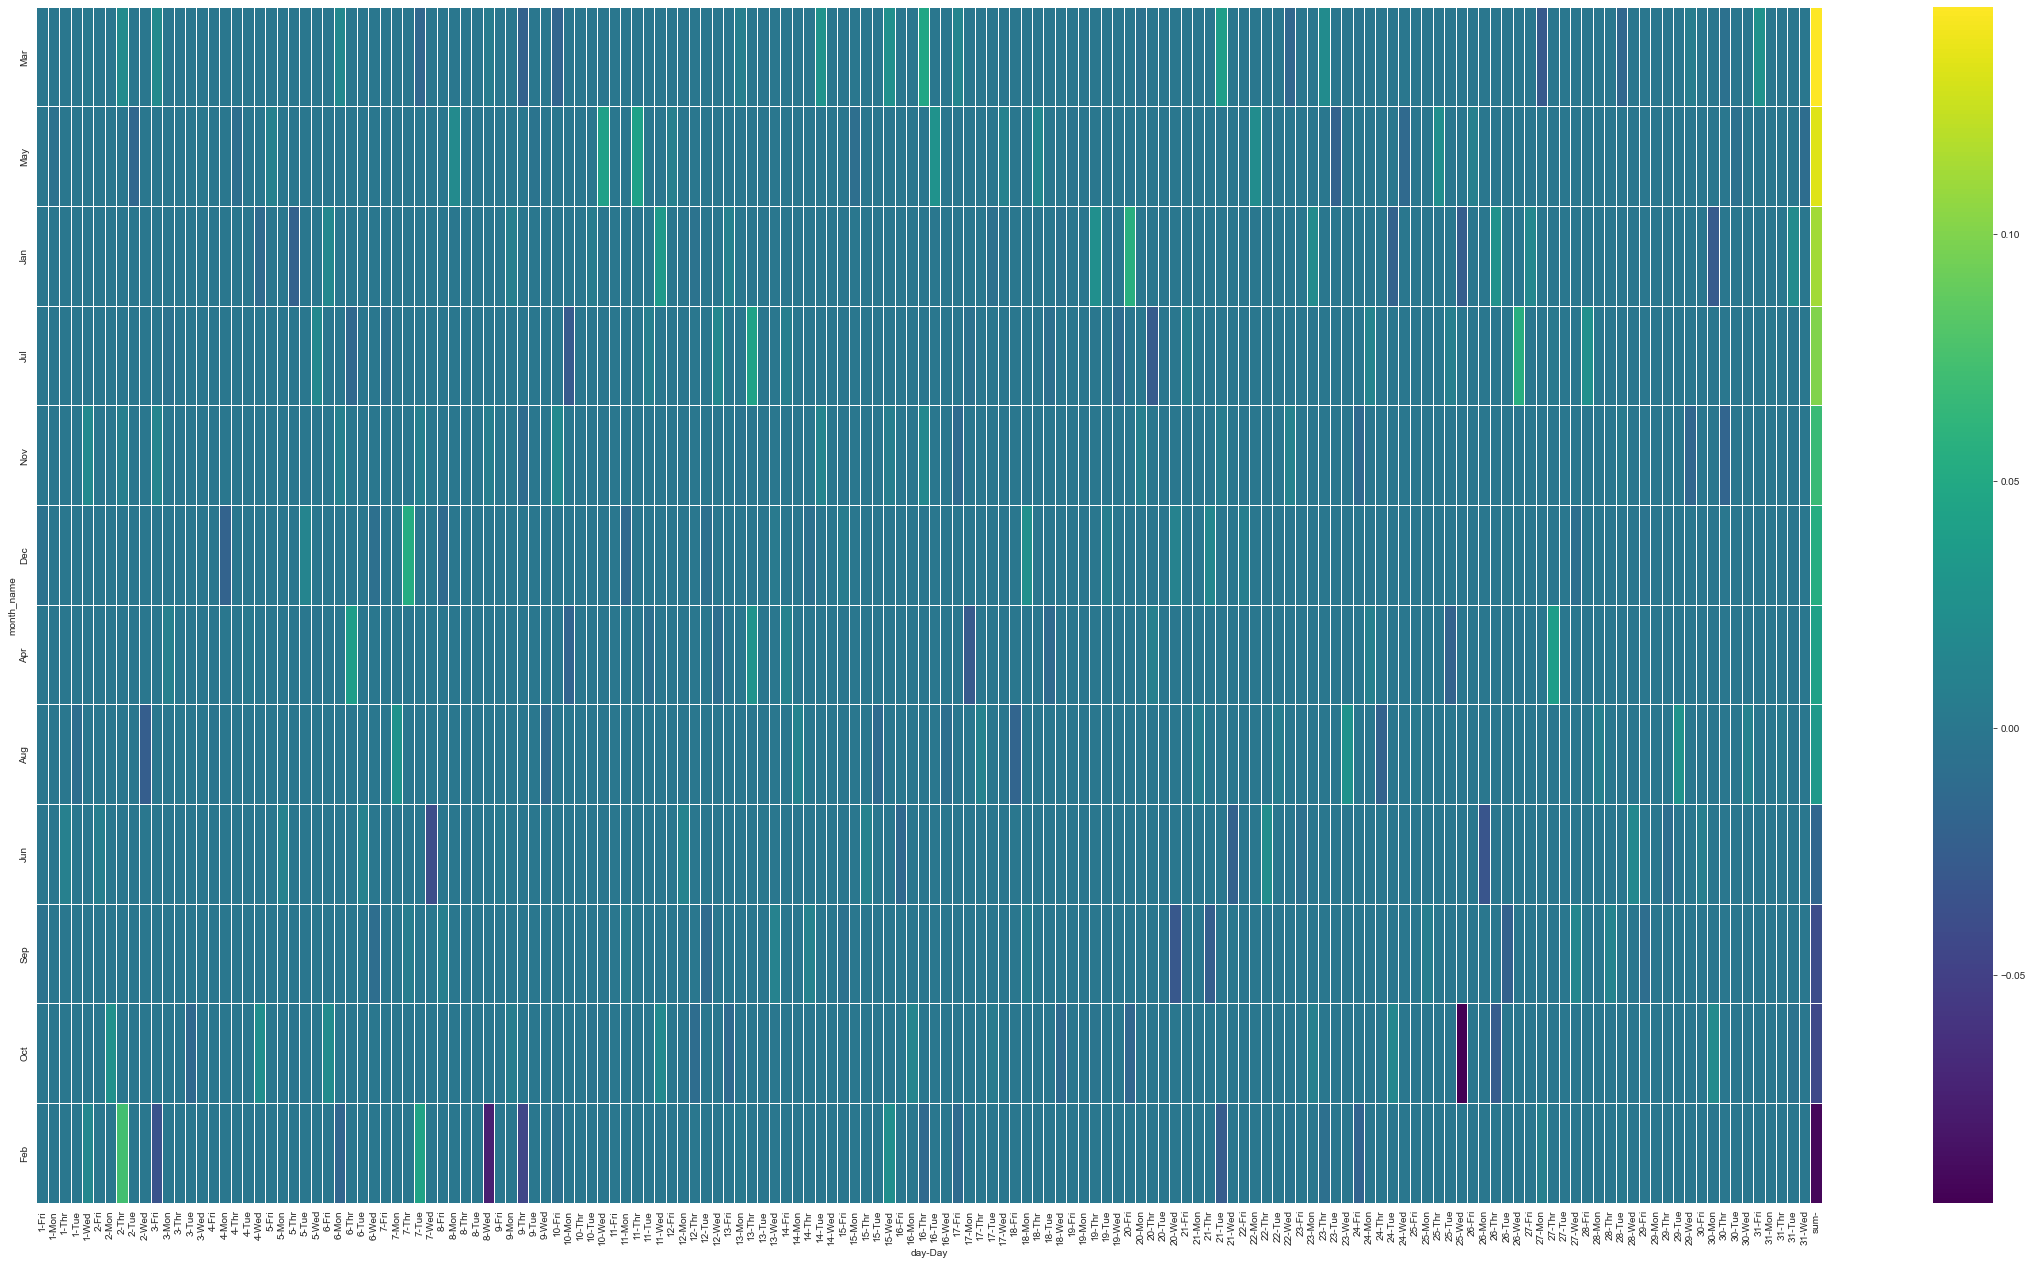

In [73]:
fig, ax = plt.subplots(figsize=(40,22))

sns.heatmap(heat_2,ax=ax,linewidths=0.5,cmap='viridis')

#### same we see inside the heatmap for GOOG

In [74]:
heat = df.groupby(['Day','day'])['GOOG'].sum().unstack().fillna(0)

heat

day        1         2         3         4         5         6         7   \
Day                                                                         
Fri -0.008485  0.006915 -0.000459 -0.001786  0.009552  0.036168 -0.006533   
Mon -0.004713  0.025180  0.005361 -0.020177  0.011179  0.008245  0.026451   
Thr  0.008106  0.100465  0.001011 -0.008575 -0.023924  0.023774  0.059544   
Tue -0.009165 -0.016062 -0.013834  0.002002  0.012815  0.010108  0.036642   
Wed  0.036062 -0.024642  0.001321  0.011244  0.015553 -0.017053 -0.038855   

day        8         9         10  ...        22        23        24  \
Day                                ...                                 
Fri -0.005731  0.001630 -0.006096  ...  0.005651 -0.006862 -0.033624   
Mon  0.019065  0.012810 -0.045125  ...  0.021258  0.027923  0.021264   
Thr -0.002196 -0.078206  0.000461  ...  0.021524  0.011622 -0.020944   
Tue -0.000758 -0.002772  0.002804  ...  0.005895 -0.020497 -0.003662   
Wed -0.062824 -0.012819  0.040207  ... -0.007922  0.027142 -0.013383   

day        25        26        27        28        29        30        31  
Day                                                                        
Fri  0.002070  0.008685  0.015307  0.022794 -0.012092  0.007999  0.026451  
Mon  0.007009 -0.031946 -0.021122  0.008417  0.000000 -0.008362  0.000752  
Thr  0.022279 -0.000378  0.039150  0.011572 -0.008837 -0.023874  0.003067  
Tue -0.012856 -0.019879 -0.000672 -0.010147  0.028075 -0.006298  0.016023  
Wed -0.120987  0.054420  0.005865  0.017394 -0.010688  0.010628 -0.010189  

[5 rows x 31 columns]

<AxesSubplot:xlabel='day', ylabel='Day'>

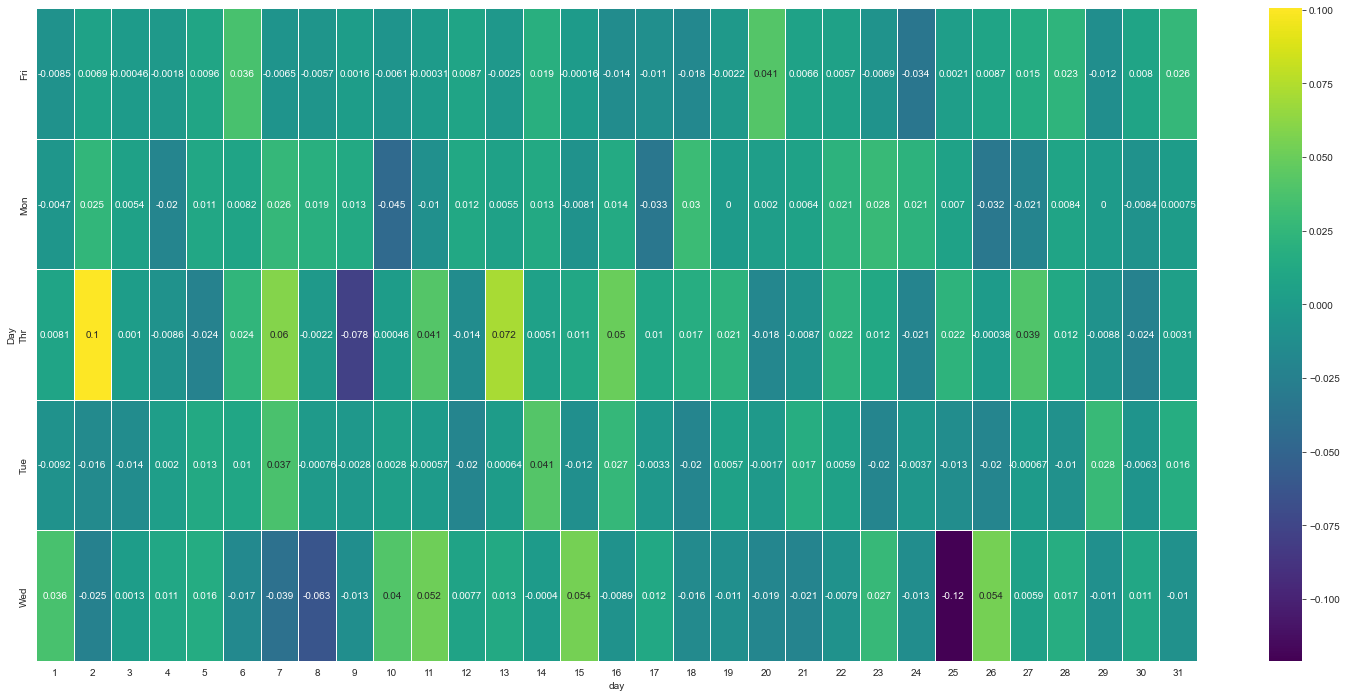

In [75]:
fig, ax = plt.subplots(figsize=(26,12))

sns.heatmap(heat,ax=ax,linewidths=0.5,cmap='viridis',annot=True)

#### seems like friday is doing well but we wanna be sure about it

In [76]:
heat['sum'] = heat.sum(axis=1)             #### we wanna see which days were most profitable 

heat

day         1         2         3         4         5         6         7  \
Day                                                                         
Fri -0.008485  0.006915 -0.000459 -0.001786  0.009552  0.036168 -0.006533   
Mon -0.004713  0.025180  0.005361 -0.020177  0.011179  0.008245  0.026451   
Thr  0.008106  0.100465  0.001011 -0.008575 -0.023924  0.023774  0.059544   
Tue -0.009165 -0.016062 -0.013834  0.002002  0.012815  0.010108  0.036642   
Wed  0.036062 -0.024642  0.001321  0.011244  0.015553 -0.017053 -0.038855   

day         8         9        10  ...        23        24        25  \
Day                                ...                                 
Fri -0.005731  0.001630 -0.006096  ... -0.006862 -0.033624  0.002070   
Mon  0.019065  0.012810 -0.045125  ...  0.027923  0.021264  0.007009   
Thr -0.002196 -0.078206  0.000461  ...  0.011622 -0.020944  0.022279   
Tue -0.000758 -0.002772  0.002804  ... -0.020497 -0.003662 -0.012856   
Wed -0.062824 -0.012819  0.040207  ...  0.027142 -0.013383 -0.120987   

day        26        27        28        29        30        31       sum  
Day                                                                        
Fri  0.008685  0.015307  0.022794 -0.012092  0.007999  0.026451  0.088389  
Mon -0.031946 -0.021122  0.008417  0.000000 -0.008362  0.000752  0.094454  
Thr -0.000378  0.039150  0.011572 -0.008837 -0.023874  0.003067  0.323018  
Tue -0.019879 -0.000672 -0.010147  0.028075 -0.006298  0.016023  0.031090  
Wed  0.054420  0.005865  0.017394 -0.010688  0.010628 -0.010189 -0.038510  

[5 rows x 32 columns]

In [77]:
heat_2 = heat.sort_values(by='sum',ascending=False)

heat_2

day         1         2         3         4         5         6         7  \
Day                                                                         
Thr  0.008106  0.100465  0.001011 -0.008575 -0.023924  0.023774  0.059544   
Mon -0.004713  0.025180  0.005361 -0.020177  0.011179  0.008245  0.026451   
Fri -0.008485  0.006915 -0.000459 -0.001786  0.009552  0.036168 -0.006533   
Tue -0.009165 -0.016062 -0.013834  0.002002  0.012815  0.010108  0.036642   
Wed  0.036062 -0.024642  0.001321  0.011244  0.015553 -0.017053 -0.038855   

day         8         9        10  ...        23        24        25  \
Day                                ...                                 
Thr -0.002196 -0.078206  0.000461  ...  0.011622 -0.020944  0.022279   
Mon  0.019065  0.012810 -0.045125  ...  0.027923  0.021264  0.007009   
Fri -0.005731  0.001630 -0.006096  ... -0.006862 -0.033624  0.002070   
Tue -0.000758 -0.002772  0.002804  ... -0.020497 -0.003662 -0.012856   
Wed -0.062824 -0.012819  0.040207  ...  0.027142 -0.013383 -0.120987   

day        26        27        28        29        30        31       sum  
Day                                                                        
Thr -0.000378  0.039150  0.011572 -0.008837 -0.023874  0.003067  0.323018  
Mon -0.031946 -0.021122  0.008417  0.000000 -0.008362  0.000752  0.094454  
Fri  0.008685  0.015307  0.022794 -0.012092  0.007999  0.026451  0.088389  
Tue -0.019879 -0.000672 -0.010147  0.028075 -0.006298  0.016023  0.031090  
Wed  0.054420  0.005865  0.017394 -0.010688  0.010628 -0.010189 -0.038510  

[5 rows x 32 columns]

<AxesSubplot:xlabel='day', ylabel='Day'>

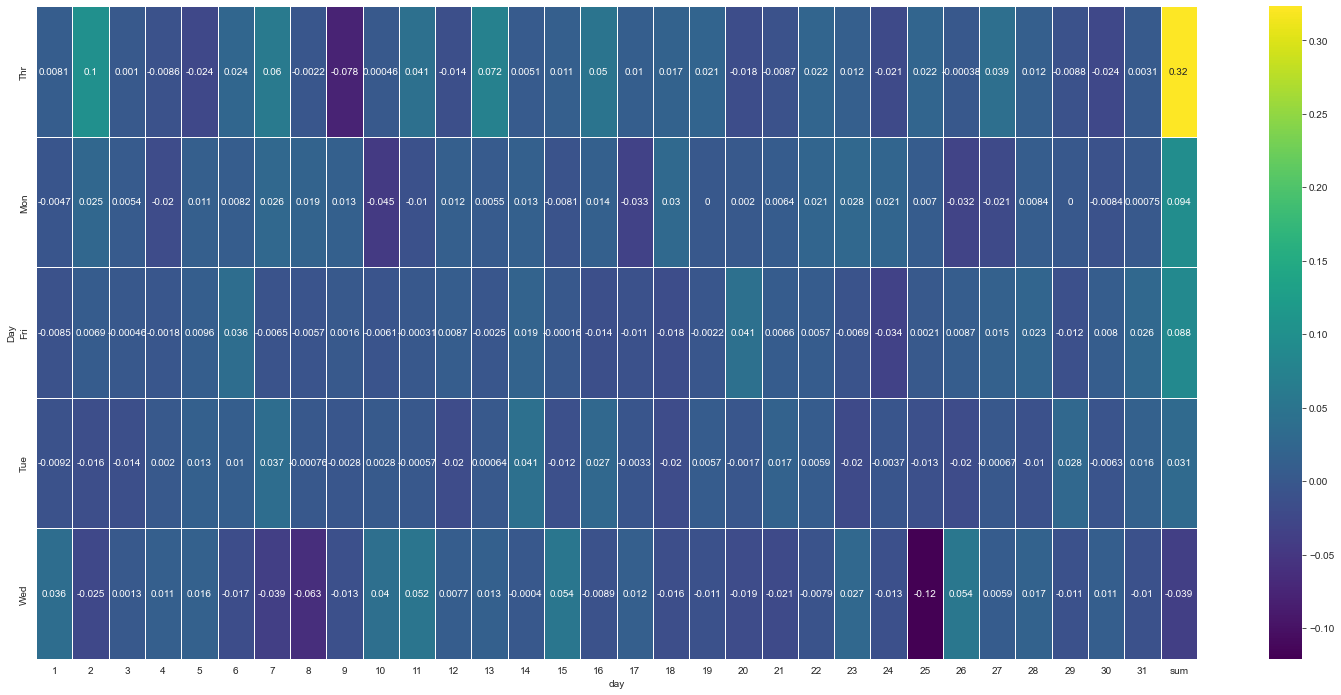

In [78]:
fig, ax = plt.subplots(figsize=(26,12))

sns.heatmap(heat_2,ax=ax,linewidths=0.5,cmap='viridis',annot=True)

#### the most profitable day being Thursday and worst being Wednesday for GOOG stocks, so Wednesday is worst for both AAPL and GOOG, interesting

In [79]:
heat = df.groupby(['month_name','Day','day'])[['AAPL','AMZN','MSFT','GOOG']].sum().unstack().unstack().fillna(0)

heat                 #### eveything in one

Ticker          AAPL                                                    \
day               1                                                 2    
Day              Fri       Mon       Thr       Tue       Wed       Fri   
month_name                                                               
Apr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Aug         0.000000  0.000000  0.000000 -0.004276  0.000000  0.000000   
Dec         0.006791  0.000000  0.000000  0.000000  0.000000  0.000000   
Feb         0.000000  0.000000  0.000000  0.000000  0.007901  0.000000   
Jan         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jul         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jun         0.000000  0.000000  0.016023  0.000000  0.000000  0.004775   
Mar         0.000000  0.000000  0.000000  0.000000 -0.014246  0.000000   
May         0.000000 -0.000531  0.000000  0.000000  0.000000  0.000000   
Nov         0.000000  0.000000  0.000000  0.000000  0.018739  0.000000   
Oct         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Sep         0.008463  0.000000  0.000000  0.000000  0.000000  0.000000   

Ticker                                             ...      GOOG            \
day                                                ...        30             
Day              Mon       Thr       Tue      Wed  ...       Fri       Mon   
month_name                                         ...                       
Apr         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Aug         0.000000  0.000000  0.000000 -0.01549  ...  0.000000  0.000000   
Dec         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Feb         0.000000  0.037063  0.000000  0.00000  ...  0.000000  0.000000   
Jan         0.000000  0.000000  0.000000  0.00000  ...  0.000000 -0.027405   
Jul         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Jun         0.000000  0.000000  0.000000  0.00000  ...  0.007999  0.000000   
Mar         0.000000  0.004129  0.000000  0.00000  ...  0.000000  0.000000   
May         0.000000  0.000000 -0.006191  0.00000  ...  0.000000  0.000000   
Nov         0.000000  0.020693  0.000000  0.00000  ...  0.000000  0.000000   
Oct         0.014836  0.000000  0.000000  0.00000  ...  0.000000  0.019044   
Sep         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   

Ticker                                                                  \
day                                             31                       
Day              Thr       Tue       Wed       Fri       Mon       Thr   
month_name                                                               
Apr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Aug         0.000000  0.000000  0.010628  0.000000  0.000000  0.003067   
Dec         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Feb         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jan         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jul         0.000000  0.000000  0.000000  0.000000  0.000752  0.000000   
Jun         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Mar        -0.005692  0.000000  0.000000  0.026451  0.000000  0.000000   
May         0.000000 -0.006298  0.000000  0.000000  0.000000  0.000000   
Nov        -0.018182  0.000000  0.000000  0.000000  0.000000  0.000000   
Oct         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Sep         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Ticker                          
day                             
Day              Tue       Wed  
month_name                      
Apr         0.000000  0.000000  
Aug         0.000000  0.000000  
Dec         0.000000  0.000000  
Feb         0.000000  0.000000  
Jan         0.019602  0.000000  
Jul         0.000000  0.000000  
Jun         0.000000  0.000000  
Mar         0.0000

<AxesSubplot:xlabel='Ticker-day-Day', ylabel='month_name'>

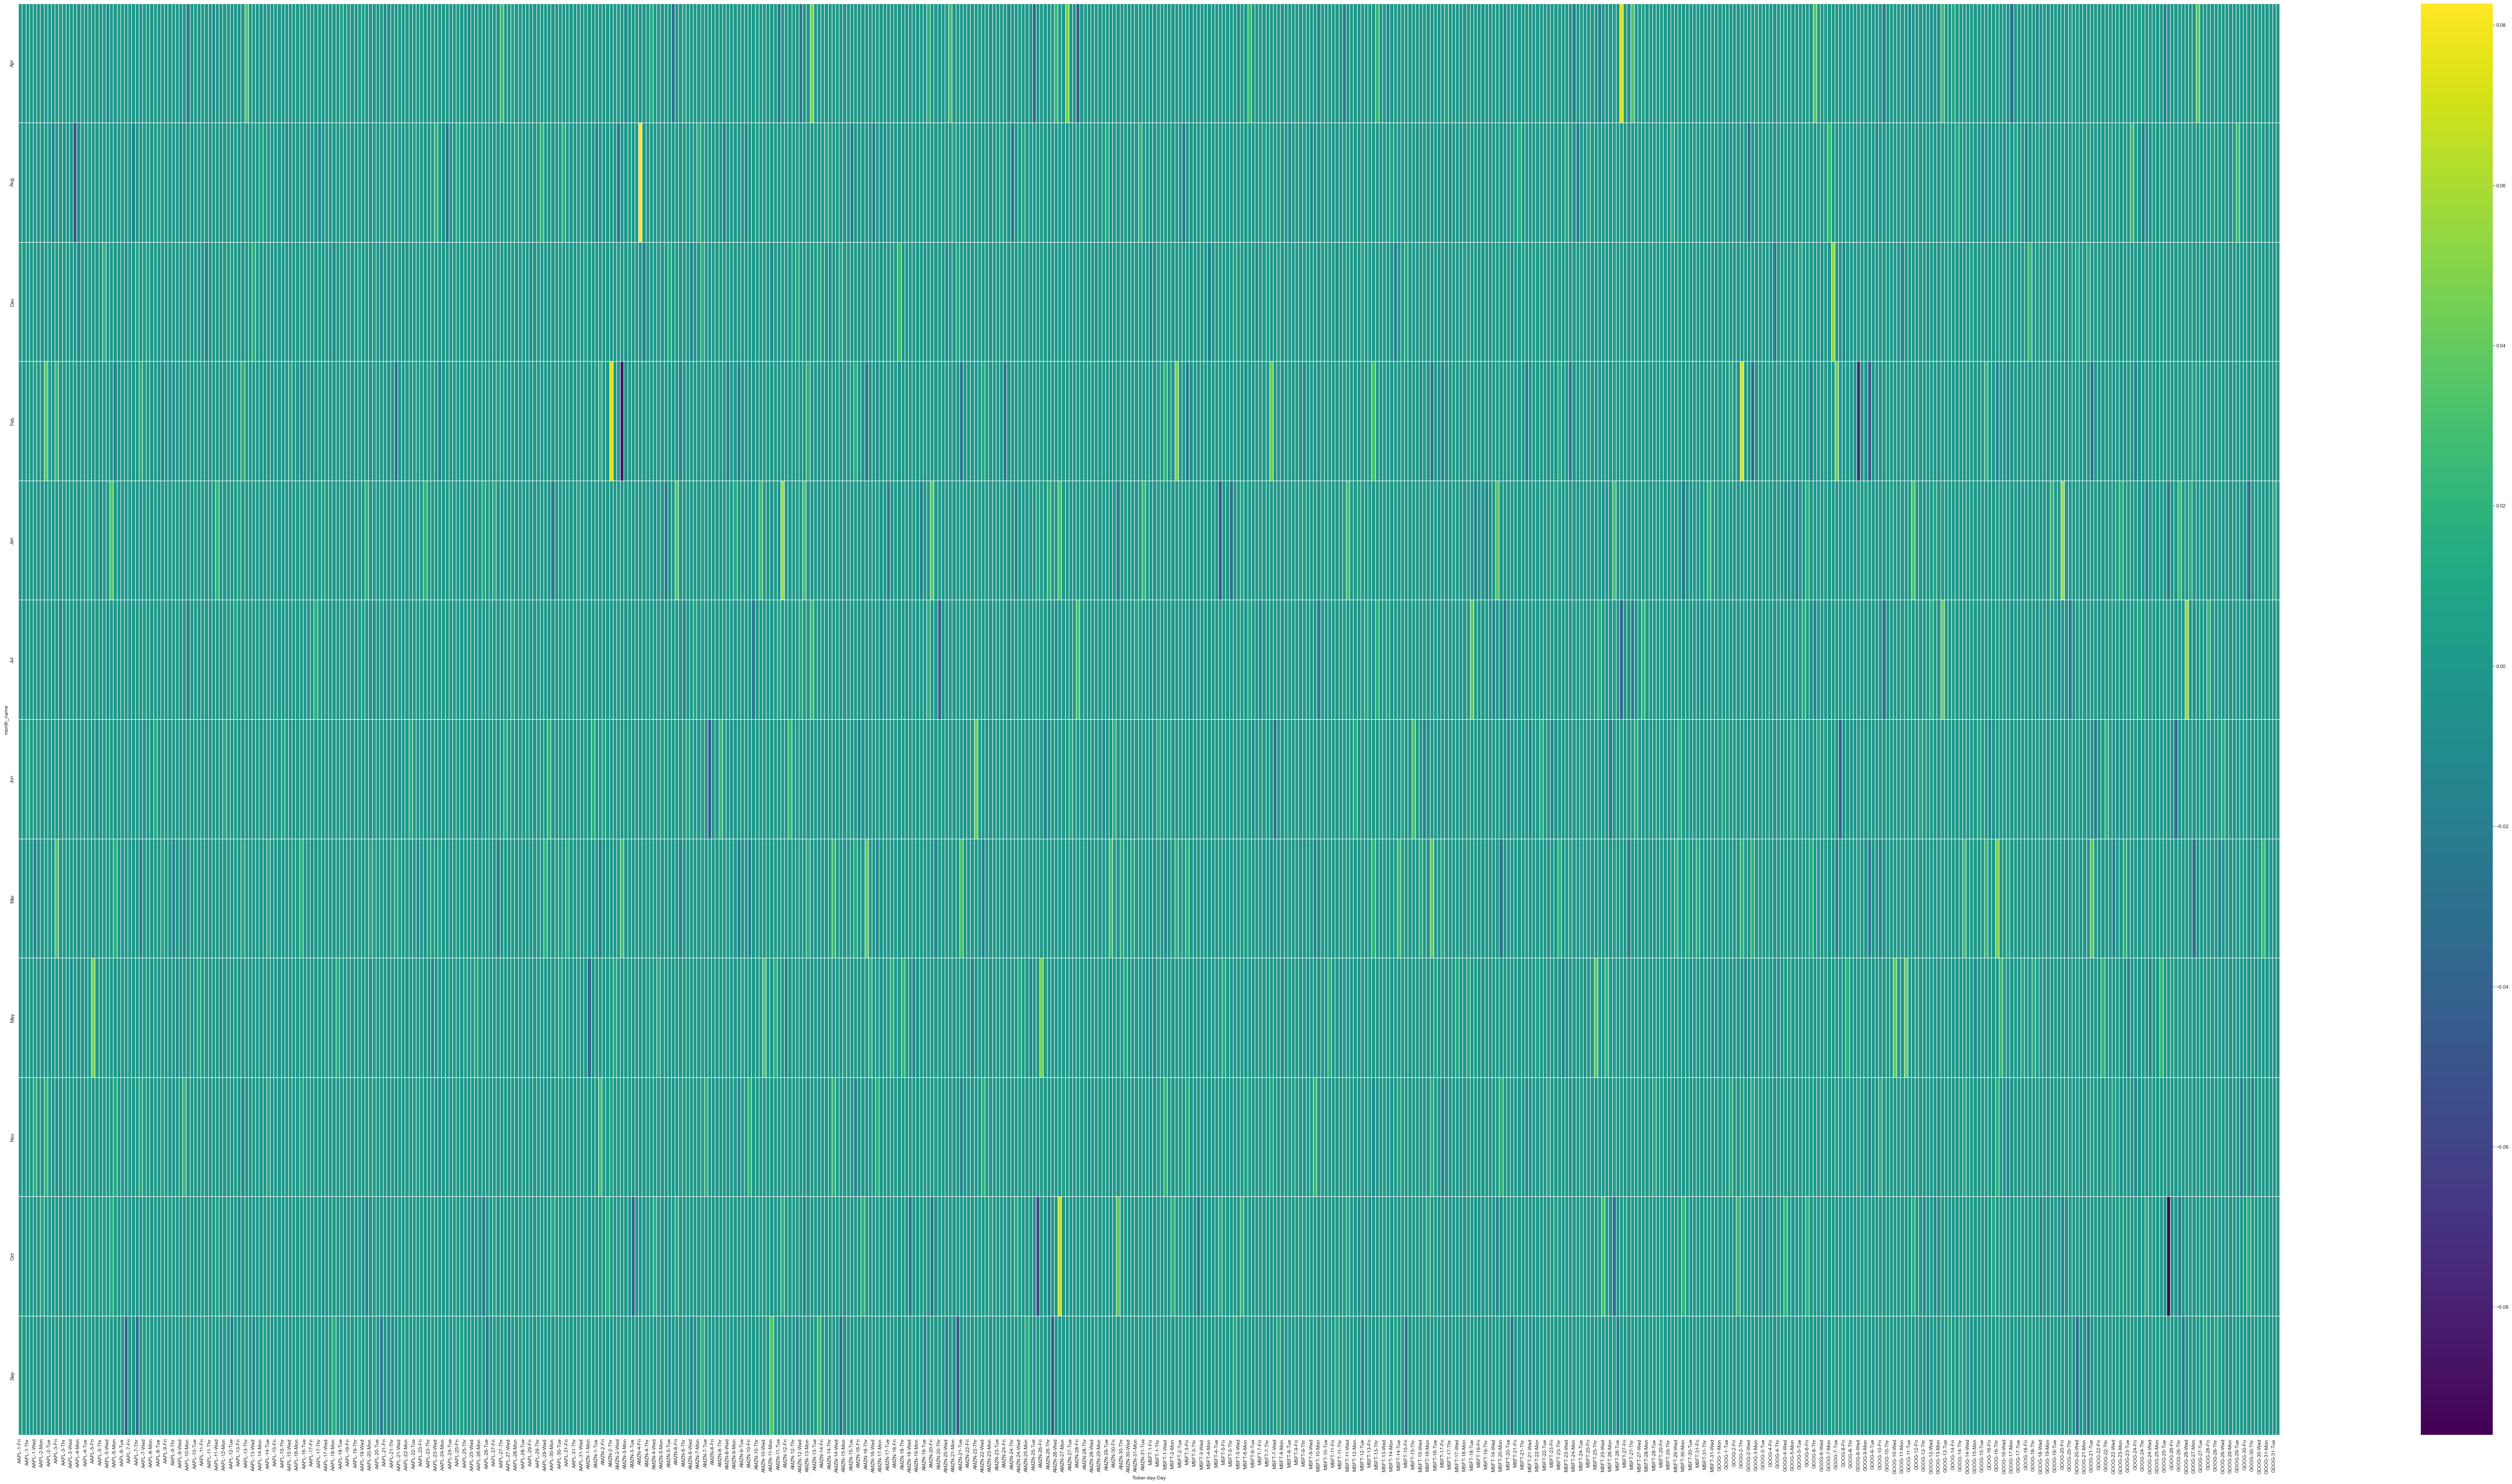

In [80]:
fig, ax = plt.subplots(figsize=(100,52))

sns.heatmap(heat,ax=ax,linewidths=0.5,cmap='viridis')


In [81]:
heat['sum'] = heat.sum(axis=1)             #### this will be interesting

heat    

Ticker          AAPL                                                    \
day                1                                                 2   
Day              Fri       Mon       Thr       Tue       Wed       Fri   
month_name                                                               
Apr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Aug         0.000000  0.000000  0.000000 -0.004276  0.000000  0.000000   
Dec         0.006791  0.000000  0.000000  0.000000  0.000000  0.000000   
Feb         0.000000  0.000000  0.000000  0.000000  0.007901  0.000000   
Jan         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jul         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jun         0.000000  0.000000  0.016023  0.000000  0.000000  0.004775   
Mar         0.000000  0.000000  0.000000  0.000000 -0.014246  0.000000   
May         0.000000 -0.000531  0.000000  0.000000  0.000000  0.000000   
Nov         0.000000  0.000000  0.000000  0.000000  0.018739  0.000000   
Oct         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Sep         0.008463  0.000000  0.000000  0.000000  0.000000  0.000000   

Ticker                                             ...      GOOG            \
day                                                ...        30             
Day              Mon       Thr       Tue      Wed  ...       Mon       Thr   
month_name                                         ...                       
Apr         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Aug         0.000000  0.000000  0.000000 -0.01549  ...  0.000000  0.000000   
Dec         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Feb         0.000000  0.037063  0.000000  0.00000  ...  0.000000  0.000000   
Jan         0.000000  0.000000  0.000000  0.00000  ... -0.027405  0.000000   
Jul         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Jun         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Mar         0.000000  0.004129  0.000000  0.00000  ...  0.000000 -0.005692   
May         0.000000  0.000000 -0.006191  0.00000  ...  0.000000  0.000000   
Nov         0.000000  0.020693  0.000000  0.00000  ...  0.000000 -0.018182   
Oct         0.014836  0.000000  0.000000  0.00000  ...  0.019044  0.000000   
Sep         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   

Ticker                                                                  \
day                                   31                                 
Day              Tue       Wed       Fri       Mon       Thr       Tue   
month_name                                                               
Apr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Aug         0.000000  0.010628  0.000000  0.000000  0.003067  0.000000   
Dec         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Feb         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jan         0.000000  0.000000  0.000000  0.000000  0.000000  0.019602   
Jul         0.000000  0.000000  0.000000  0.000752  0.000000  0.000000   
Jun         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Mar         0.000000  0.000000  0.026451  0.000000  0.000000  0.000000   
May        -0.006298  0.000000  0.000000  0.000000  0.000000  0.000000   
Nov         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Oct         0.000000  0.000000  0.000000  0.000000  0.000000 -0.003579   
Sep         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Ticker                     sum  
day                             
Day              Wed            
month_name                      
Apr         0.000000  0.167014  
Aug         0.000000  0.009620  
Dec         0.000000  0.101698  
Feb         0.000000 -0.134657  
Jan         0.000000  0.484540  
Jul         0.000000  0.130219  
Jun         0.000000  0.194102  
Mar         0.0000

In [82]:
heat_2 = heat.sort_values(by='sum',ascending=False)

heat_2                        #### March being the best month for all stocks, interesting

Ticker          AAPL                                                    \
day                1                                                 2   
Day              Fri       Mon       Thr       Tue       Wed       Fri   
month_name                                                               
Mar         0.000000  0.000000  0.000000  0.000000 -0.014246  0.000000   
Jan         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Nov         0.000000  0.000000  0.000000  0.000000  0.018739  0.000000   
May         0.000000 -0.000531  0.000000  0.000000  0.000000  0.000000   
Jun         0.000000  0.000000  0.016023  0.000000  0.000000  0.004775   
Apr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jul         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Dec         0.006791  0.000000  0.000000  0.000000  0.000000  0.000000   
Oct         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Aug         0.000000  0.000000  0.000000 -0.004276  0.000000  0.000000   
Feb         0.000000  0.000000  0.000000  0.000000  0.007901  0.000000   
Sep         0.008463  0.000000  0.000000  0.000000  0.000000  0.000000   

Ticker                                             ...      GOOG            \
day                                                ...        30             
Day              Mon       Thr       Tue      Wed  ...       Mon       Thr   
month_name                                         ...                       
Mar         0.000000  0.004129  0.000000  0.00000  ...  0.000000 -0.005692   
Jan         0.000000  0.000000  0.000000  0.00000  ... -0.027405  0.000000   
Nov         0.000000  0.020693  0.000000  0.00000  ...  0.000000 -0.018182   
May         0.000000  0.000000 -0.006191  0.00000  ...  0.000000  0.000000   
Jun         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Apr         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Jul         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Dec         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   
Oct         0.014836  0.000000  0.000000  0.00000  ...  0.019044  0.000000   
Aug         0.000000  0.000000  0.000000 -0.01549  ...  0.000000  0.000000   
Feb         0.000000  0.037063  0.000000  0.00000  ...  0.000000  0.000000   
Sep         0.000000  0.000000  0.000000  0.00000  ...  0.000000  0.000000   

Ticker                                                                  \
day                                   31                                 
Day              Tue       Wed       Fri       Mon       Thr       Tue   
month_name                                                               
Mar         0.000000  0.000000  0.026451  0.000000  0.000000  0.000000   
Jan         0.000000  0.000000  0.000000  0.000000  0.000000  0.019602   
Nov         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
May        -0.006298  0.000000  0.000000  0.000000  0.000000  0.000000   
Jun         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Apr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jul         0.000000  0.000000  0.000000  0.000752  0.000000  0.000000   
Dec         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Oct         0.000000  0.000000  0.000000  0.000000  0.000000 -0.003579   
Aug         0.000000  0.010628  0.000000  0.000000  0.003067  0.000000   
Feb         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Sep         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Ticker                     sum  
day                             
Day              Wed            
month_name                      
Mar         0.000000  0.504514  
Jan         0.000000  0.484540  
Nov         0.000000  0.389692  
May        -0.010189  0.389644  
Jun         0.000000  0.194102  
Apr         0.000000  0.167014  
Jul         0.000000  0.130219  
Dec         0.0000

<AxesSubplot:xlabel='Ticker-day-Day', ylabel='month_name'>

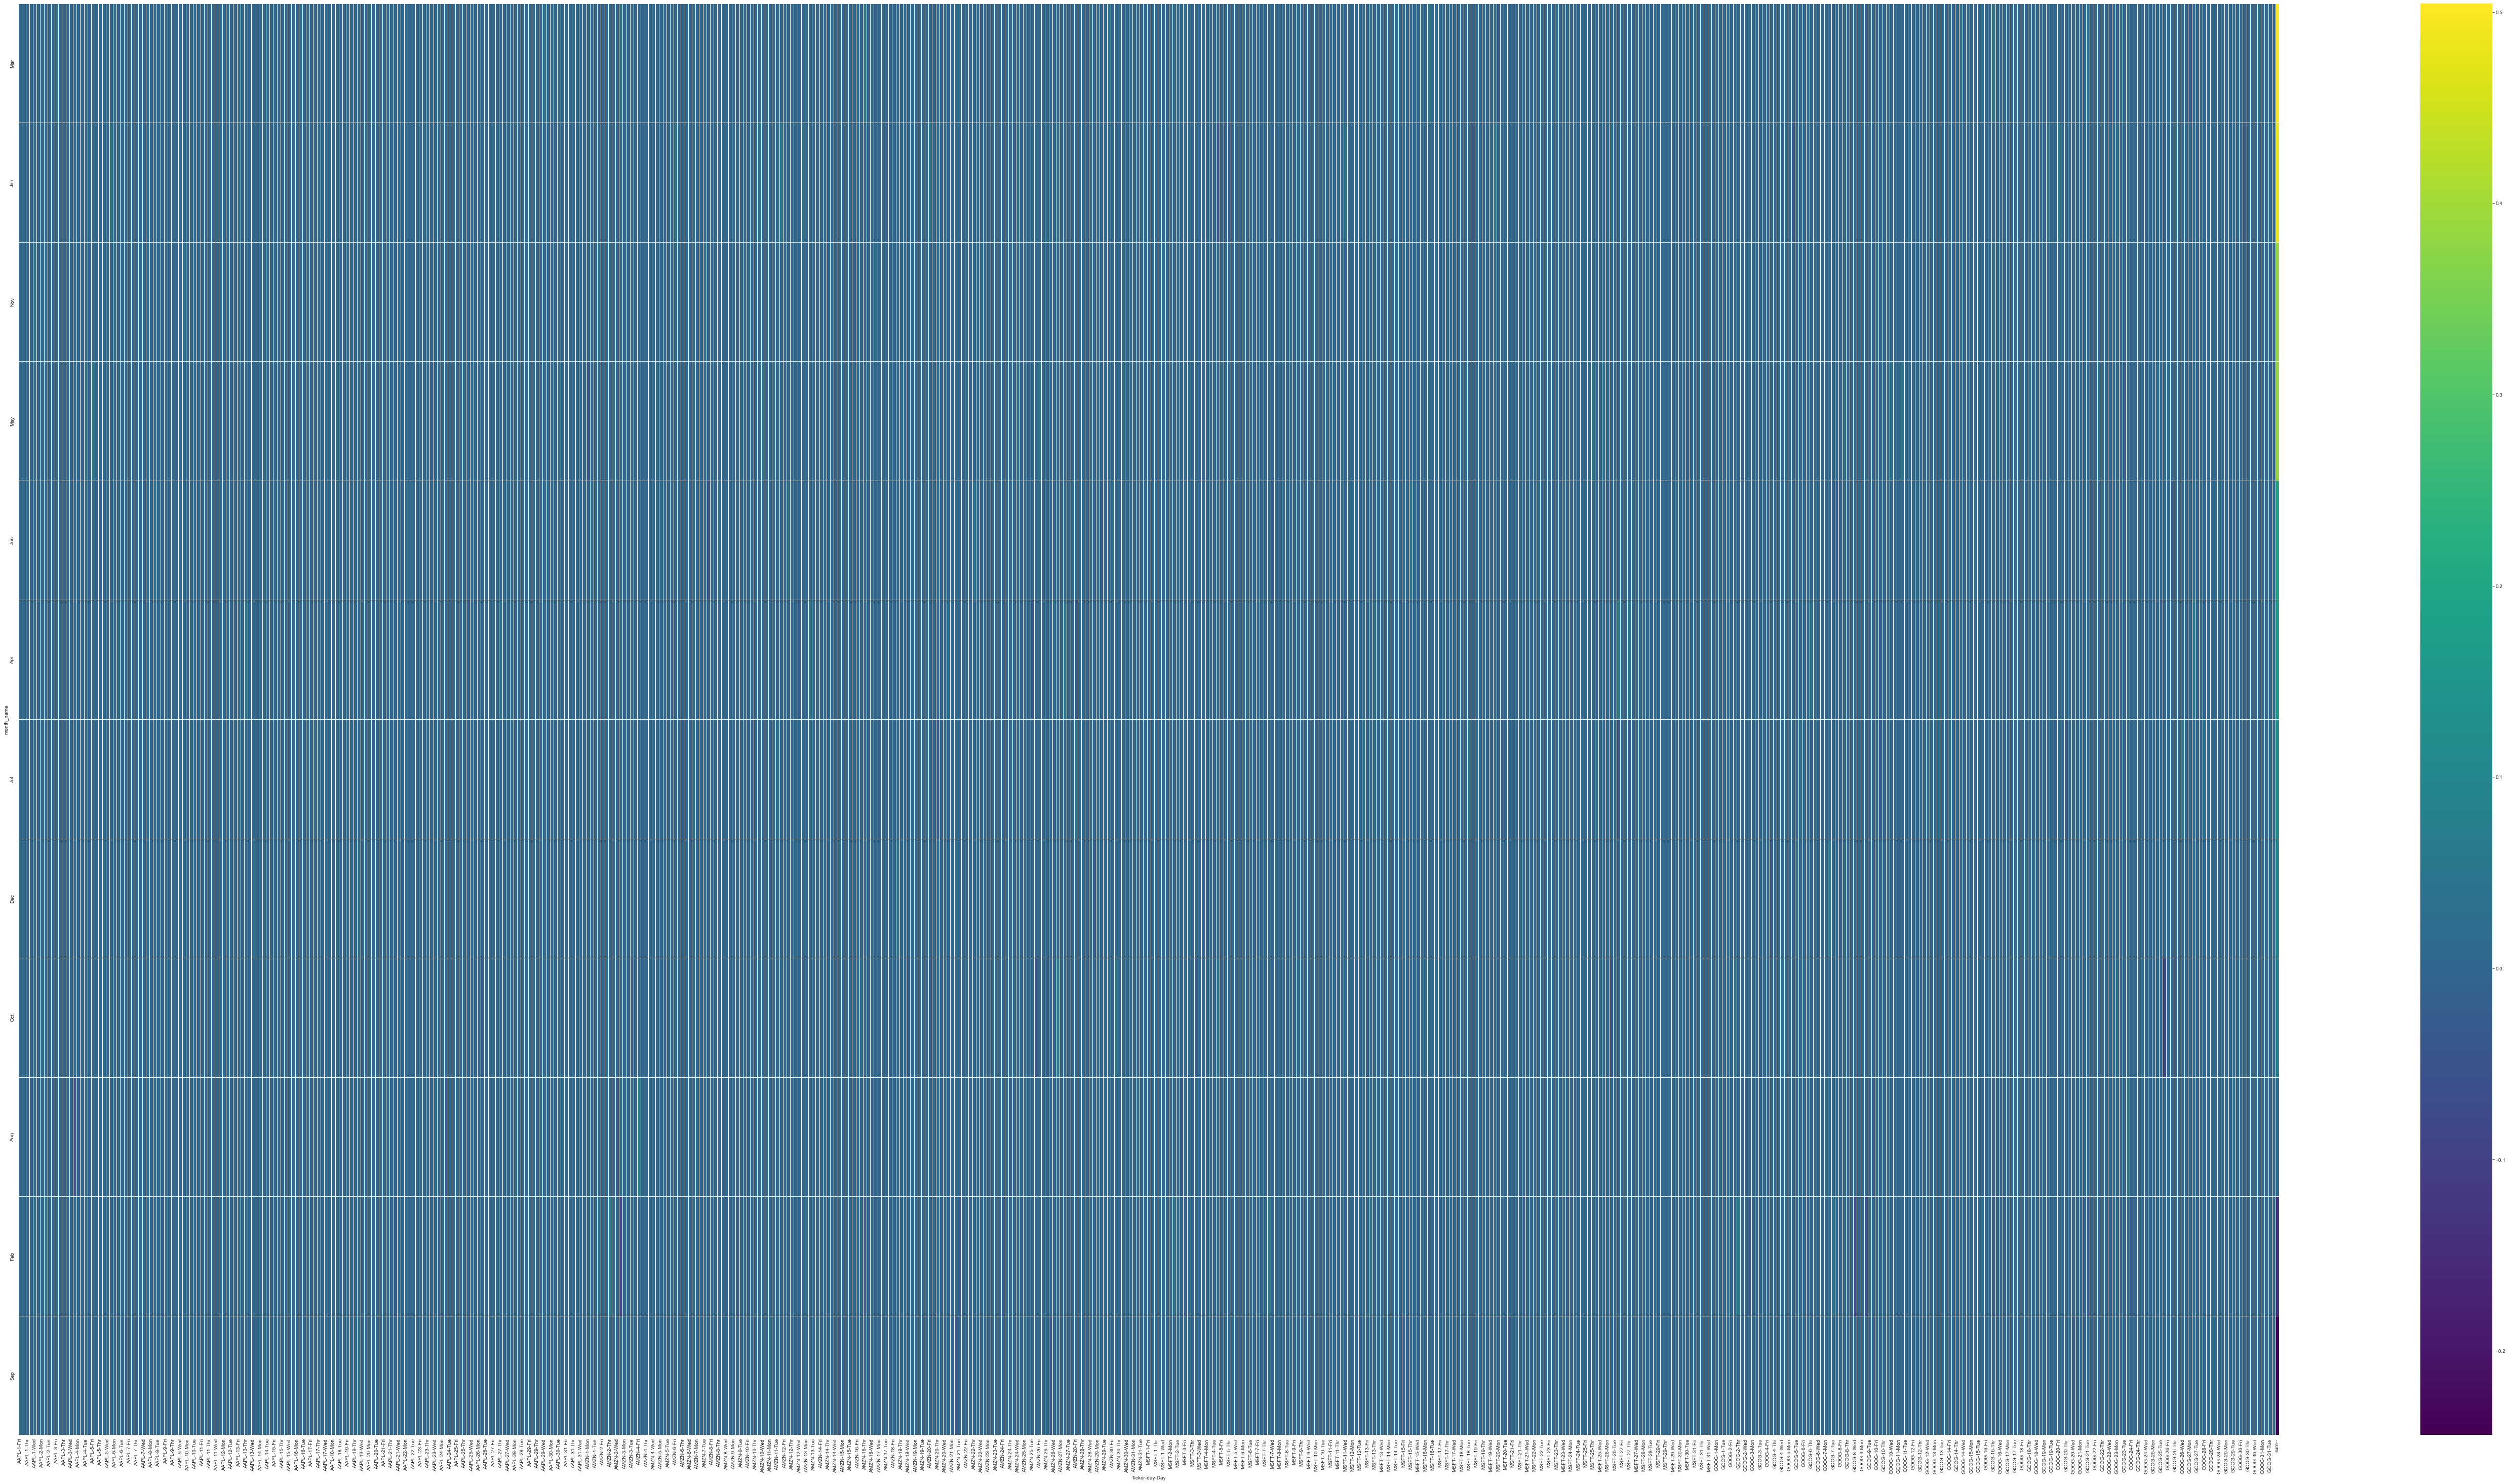

In [83]:
fig, ax = plt.subplots(figsize=(100,52))

sns.heatmap(heat_2,ax=ax,linewidths=0.5,cmap='viridis')

#### this has all the information you will need honestly

In [84]:
heat = df.groupby(['Day','day'])[['AAPL','AMZN','MSFT','GOOG']].sum().unstack().fillna(0)

heat['sum'] = heat.sum(axis=1) 

heat

Ticker      AAPL                                                              \
day            1         2         3         4         5         6         7   
Day                                                                            
Fri     0.015255  0.004775  0.054309 -0.048020  0.046927  0.051545 -0.005891   
Mon    -0.000531  0.014836 -0.000083 -0.009465 -0.007571  0.015216 -0.017254   
Thr     0.016023  0.061885 -0.007322 -0.009913 -0.003407  0.008005 -0.019110   
Tue    -0.004276 -0.006191 -0.007770 -0.003250  0.022330 -0.002060  0.019199   
Wed     0.012394 -0.015490 -0.006467  0.017623 -0.017162 -0.041480 -0.007756   

Ticker                                ...      GOOG                      \
day            8         9        10  ...        23        24        25   
Day                                   ...                                 
Fri     0.010904  0.002160  0.011797  ... -0.006862 -0.033624  0.002070   
Mon    -0.000403  0.012540 -0.026828  ...  0.027923  0.021264  0.007009   
Thr     0.015465 -0.024451 -0.001235  ...  0.011622 -0.020944  0.022279   
Tue     0.005312 -0.009971  0.001104  ... -0.020497 -0.003662 -0.012856   
Wed    -0.003391 -0.008954  0.010421  ...  0.027142 -0.013383 -0.120987   

Ticker                                                                   sum  
day           26        27        28        29        30        31            
Day                                                                           
Fri     0.008685  0.015307  0.022794 -0.012092  0.007999  0.026451  0.632606  
Mon    -0.031946 -0.021122  0.008417  0.000000 -0.008362  0.000752  0.444328  
Thr    -0.000378  0.039150  0.011572 -0.008837 -0.023874  0.003067  0.854872  
Tue    -0.019879 -0.000672 -0.010147  0.028075 -0.006298  0.016023  0.128179  
Wed     0.054420  0.005865  0.017394 -0.010688  0.010628 -0.010189  0.011658  

[5 rows x 125 columns]

In [85]:
heat_2 = heat.sort_values(by='sum',ascending=False)

heat_2

Ticker      AAPL                                                              \
day            1         2         3         4         5         6         7   
Day                                                                            
Thr     0.016023  0.061885 -0.007322 -0.009913 -0.003407  0.008005 -0.019110   
Fri     0.015255  0.004775  0.054309 -0.048020  0.046927  0.051545 -0.005891   
Mon    -0.000531  0.014836 -0.000083 -0.009465 -0.007571  0.015216 -0.017254   
Tue    -0.004276 -0.006191 -0.007770 -0.003250  0.022330 -0.002060  0.019199   
Wed     0.012394 -0.015490 -0.006467  0.017623 -0.017162 -0.041480 -0.007756   

Ticker                                ...      GOOG                      \
day            8         9        10  ...        23        24        25   
Day                                   ...                                 
Thr     0.015465 -0.024451 -0.001235  ...  0.011622 -0.020944  0.022279   
Fri     0.010904  0.002160  0.011797  ... -0.006862 -0.033624  0.002070   
Mon    -0.000403  0.012540 -0.026828  ...  0.027923  0.021264  0.007009   
Tue     0.005312 -0.009971  0.001104  ... -0.020497 -0.003662 -0.012856   
Wed    -0.003391 -0.008954  0.010421  ...  0.027142 -0.013383 -0.120987   

Ticker                                                                   sum  
day           26        27        28        29        30        31            
Day                                                                           
Thr    -0.000378  0.039150  0.011572 -0.008837 -0.023874  0.003067  0.854872  
Fri     0.008685  0.015307  0.022794 -0.012092  0.007999  0.026451  0.632606  
Mon    -0.031946 -0.021122  0.008417  0.000000 -0.008362  0.000752  0.444328  
Tue    -0.019879 -0.000672 -0.010147  0.028075 -0.006298  0.016023  0.128179  
Wed     0.054420  0.005865  0.017394 -0.010688  0.010628 -0.010189  0.011658  

[5 rows x 125 columns]

<AxesSubplot:xlabel='Ticker-day', ylabel='Day'>

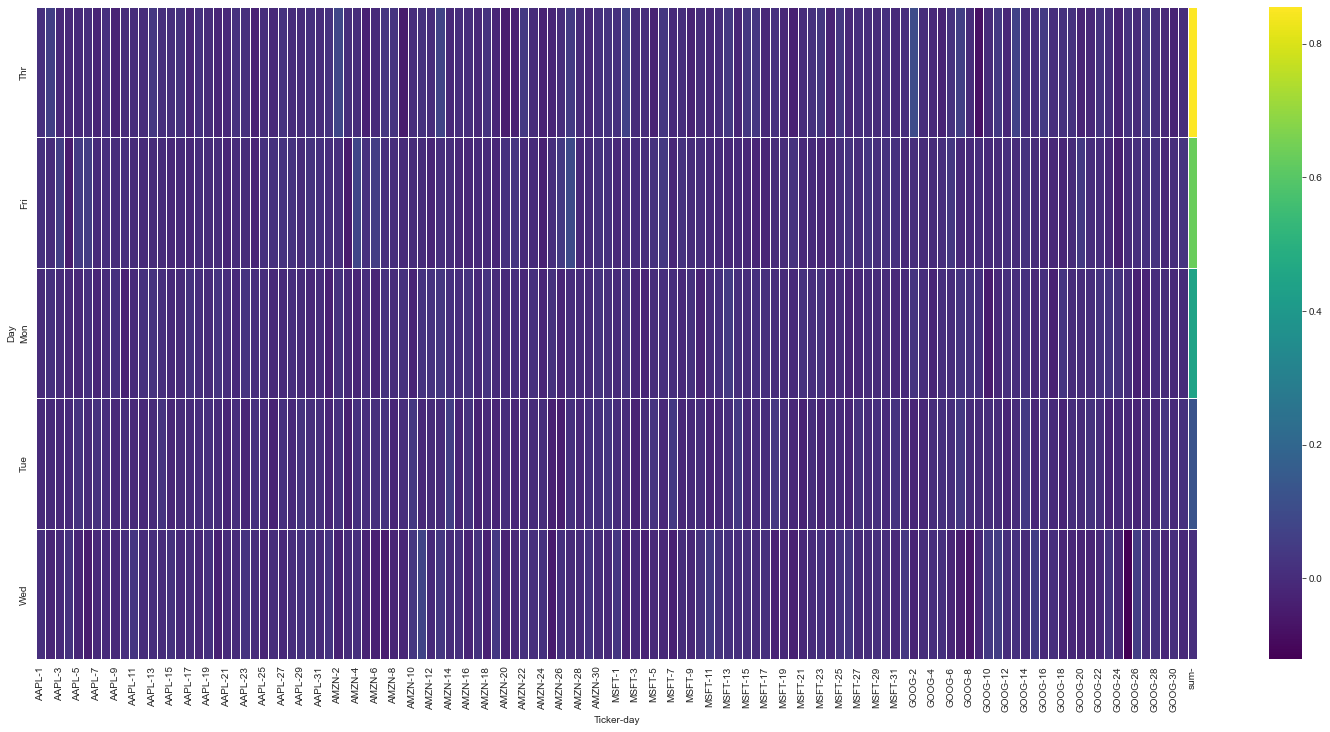

In [86]:
fig, ax = plt.subplots(figsize=(26,12))

sns.heatmap(heat_2,ax=ax,linewidths=0.5,cmap='viridis')

#### similar thing we here, Friday and Thursday being the best days to trade while Wednesday being the worst as a customer

In [87]:
#### we will now see the Risk Analysis

return_df.head()

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2023-01-03  0.000000  0.000000  0.000000  0.000000
2023-01-04  0.010314 -0.007924 -0.011037 -0.043743
2023-01-05 -0.010605 -0.023726 -0.021869 -0.029638
2023-01-06  0.036794  0.035611  0.016019  0.011785
2023-01-09  0.004089  0.014870  0.007259  0.009736

In [88]:
risk = return_df

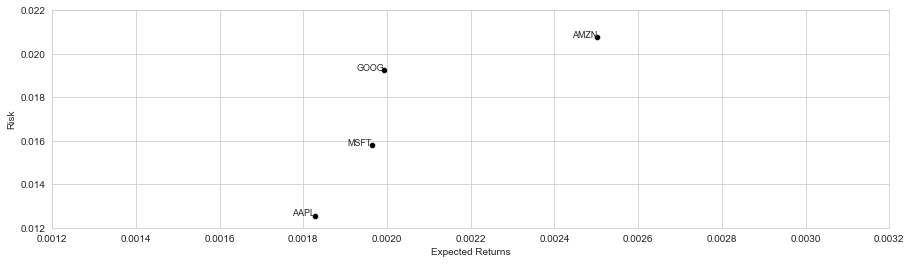

In [89]:
fig, ax = plt.subplots(figsize=(15,4))

pl = sns.scatterplot(x=risk.mean(),y=risk.std(),ax=ax,color='black')

pl.set_xlabel('Expected Returns')

pl.set_ylabel('Risk')

ax.set_xlim(risk.mean().min() - 0.0005, risk.mean().max() + 0.0005)

ax.set_ylim(risk.std().min() - 0.0005, risk.std().max() + 0.0005)

ax.set_xticks([round(x, 5) for x in plt.xticks()[0]])

ax.set_yticks([round(y, 5) for y in plt.yticks()[0]])


for i,ticker in enumerate(risk.mean().index):
    pl.text(risk.mean()[i],
           risk.std()[i],ticker,fontsize=9,ha='right')

#### just like we had previously observed, AAPL being the most safe and reliable investment, while AMZN being the most risky

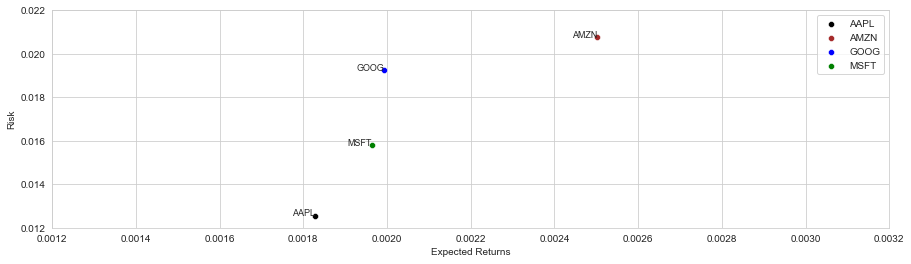

In [90]:
fig, ax = plt.subplots(figsize=(15, 4))

colors = ['black', 'brown', 'blue', 'green']

for i, ticker in enumerate(risk.mean().index):
    sns.scatterplot(x=[risk.mean()[ticker]], y=[risk.std()[ticker]], ax=ax, color=colors[i], label=ticker)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

ax.set_xlim(risk.mean().min() - 0.0005, risk.mean().max() + 0.0005)
ax.set_ylim(risk.std().min() - 0.0005, risk.std().max() + 0.0005)
ax.set_xticks([round(x, 5) for x in plt.xticks()[0]])
ax.set_yticks([round(y, 5) for y in plt.yticks()[0]])

for i, ticker in enumerate(risk.mean().index):
    plt.text(risk.mean()[i], risk.std()[i], ticker, fontsize=9, ha='right')

plt.legend()
plt.show()

#### same plot but we wanted to use different colors for different stocks, nothing fancy just color change


In [91]:
return_df.head()

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2023-01-03  0.000000  0.000000  0.000000  0.000000
2023-01-04  0.010314 -0.007924 -0.011037 -0.043743
2023-01-05 -0.010605 -0.023726 -0.021869 -0.029638
2023-01-06  0.036794  0.035611  0.016019  0.011785
2023-01-09  0.004089  0.014870  0.007259  0.009736

In [93]:
return_df.AAPL.quantile(0.05)   #### what this means is that with 95% confidence we can say our one day loss will not exceed 1.7%

#### or in other words 95% of the data set is above this value

-0.017166834132278912

In [94]:
return_df.AAPL.quantile(0.95)   #### this means its the 95 percentile of the data set, meaning only 5% is below this


0.021090309153828677

In [95]:
return_df.AMZN.quantile(0.05)   #### 95% confidence and one day loss at any day not exceed 2.7% for Amazon

-0.027298981993707082

In [96]:
return_df.GOOG.quantile(0.05)   #### 95% confidence, one day loss at any day not exceed 2.6% for Google

-0.02603325577926022

In [97]:
return_df.MSFT.quantile(0.05)   #### 95% confidence, one day loss at any day not exceed 2.2% for Microsoft

-0.022917646062723968

In [98]:
return_df.GOOG.mean()

0.0019937648570987516

In [99]:
return_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    250 non-null    float64
 1   AMZN    250 non-null    float64
 2   GOOG    250 non-null    float64
 3   MSFT    250 non-null    float64
dtypes: float64(4)
memory usage: 9.8 KB


In [100]:
return_df.GOOG.quantile(0.01)    #### 99% confidence level, worst one day loss cant exceed 4.2% at any given day of Google stock


-0.04219317579746764

In [101]:
#### monte carlo method to predict the future stock price

closing_df

Ticker            AAPL        AMZN        GOOG        MSFT
Date                                                      
2023-01-03  124.048050   85.820000   89.598038  236.609207
2023-01-04  125.327507   85.139999   88.609169  226.259186
2023-01-05  123.998459   83.120003   86.671371  219.553360
2023-01-06  128.560867   86.080002   88.059799  222.140869
2023-01-09  129.086533   87.360001   88.699066  224.303726
...                ...         ...         ...         ...
2023-12-22  193.091385  153.419998  142.557770  373.215393
2023-12-26  192.542816  153.410004  142.657669  373.295135
2023-12-27  192.642548  153.339996  141.279236  372.707275
2023-12-28  193.071426  153.380005  141.119415  373.912842
2023-12-29  192.024185  151.940002  140.769806  374.670074

[250 rows x 4 columns]

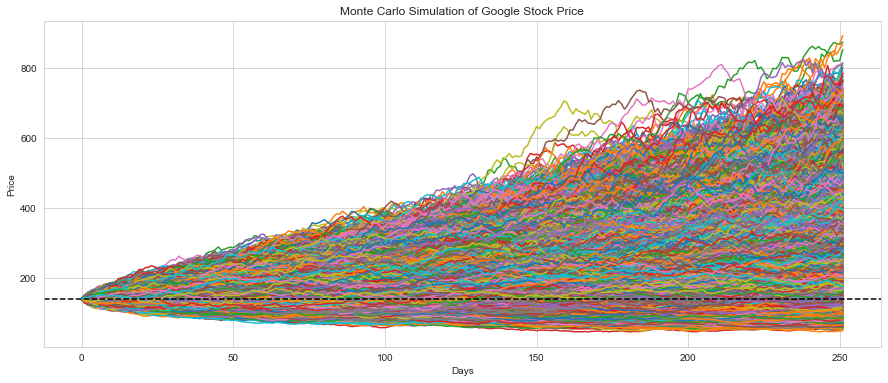

In [102]:

mean_return = return_df.GOOG.mean()
std_return = return_df.GOOG.std()

closing_prices = closing_df.GOOG


# Step 4: Simulate Future Prices
# Parameters
num_simulations = 1000000
num_days = 252  # Number of trading days in a year

# Simulation
simulated_prices = np.zeros((num_simulations, num_days))
simulated_prices[:, 0] = closing_prices[-1]

for i in range(1, num_days):
    random_returns = np.random.normal(mean_return, std_return, num_simulations)
    simulated_prices[:, i] = simulated_prices[:, i-1] * (1 + random_returns)
    
plt.figure(figsize=(15, 6))
plt.plot(simulated_prices.T)

plt.axhline(y=closing_prices[-1], color='black', linestyle='--')


plt.title(f'Monte Carlo Simulation of Google Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')

#### black line is our closing price and the rest is the predictions, you will realize the majority of data points increase in stock price as the days grows bigger
#### while lower band suggests that the price will go down, again here we see the percentile difference

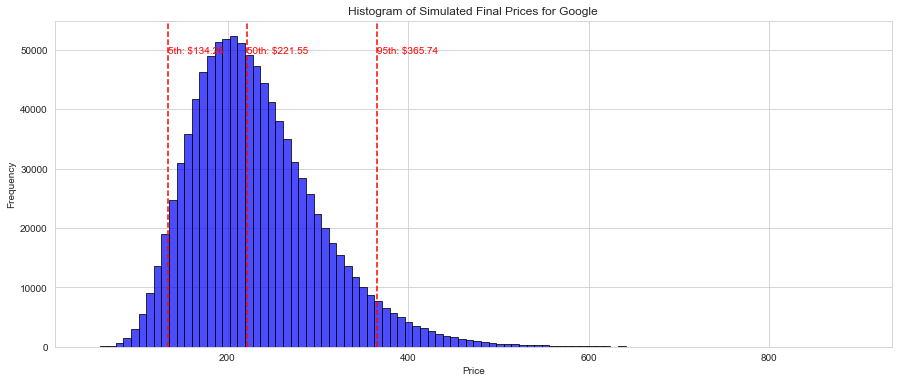

In [103]:
final_prices = simulated_prices[:, -1]

plt.figure(figsize=(15, 6))
sns.histplot(final_prices, bins=100, alpha=0.7, edgecolor='black',color='blue')

quantiles = [0.05, 0.5, 0.95]
quantile_values = np.quantile(final_prices, quantiles)

for quantile, value in zip(quantiles, quantile_values):
    plt.axvline(x=value, color='red', linestyle='--')
    plt.text(value, plt.ylim()[1] * 0.9, f'{int(quantile*100)}th: ${value:.2f}', color='red')

# Title and labels
plt.title(f'Histogram of Simulated Final Prices for Google')
plt.xlabel('Price')
plt.ylabel('Frequency')


In [104]:
closing_prices[-1]

140.76980590820312

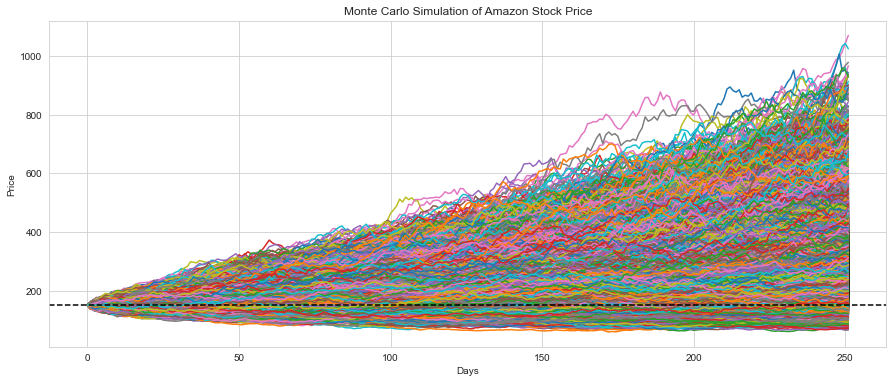

In [106]:
#### because amazon was so highly correlated to google stock so now lets do the same treatment to amazon stocks

mean_return = return_df.AMZN.mean()
std_return = return_df.AMZN.std()

closing_prices = closing_df.AMZN


# Step 4: Simulate Future Prices
# Parameters
num_simulations = 10000000
num_days = 252  # Number of trading days in a year

# Simulation
simulated_prices = np.zeros((num_simulations, num_days))
simulated_prices[:, 0] = closing_prices[-1]

for i in range(1, num_days):
    random_returns = np.random.normal(mean_return, std_return, num_simulations)
    simulated_prices[:, i] = simulated_prices[:, i-1] * (1 + random_returns)
    
plt.figure(figsize=(15, 6))
plt.plot(simulated_prices.T)

plt.axhline(y=closing_prices[-1], color='black', linestyle='--')


plt.title(f'Monte Carlo Simulation of Amazon Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')


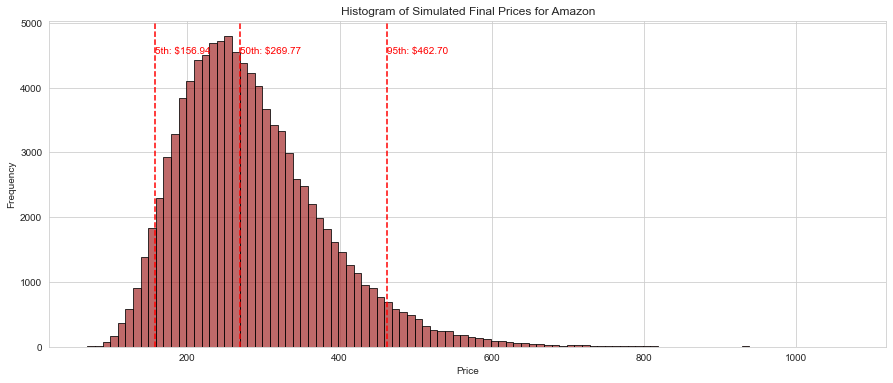

In [108]:
final_prices = simulated_prices[:, -1]

plt.figure(figsize=(15, 6))
sns.histplot(final_prices, bins=100, alpha=0.7, edgecolor='black',color='brown')

quantiles = [0.05, 0.5, 0.95]
quantile_values = np.quantile(final_prices, quantiles)

for quantile, value in zip(quantiles, quantile_values):
    plt.axvline(x=value, color='red', linestyle='--')
    plt.text(value, plt.ylim()[1] * 0.9, f'{int(quantile*100)}th: ${value:.2f}', color='red')

# Title and labels
plt.title(f'Histogram of Simulated Final Prices for Amazon')
plt.xlabel('Price')
plt.ylabel('Frequency')


In [109]:
closing_prices[-1]

151.94000244140625

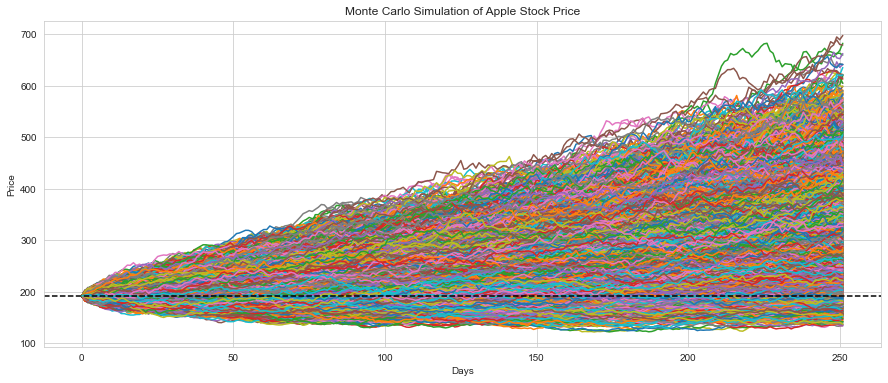

In [114]:
mean_return = return_df.AAPL.mean()
std_return = return_df.AAPL.std()

closing_prices = closing_df.AAPL


# Step 4: Simulate Future Prices
# Parameters
num_simulations = 100000
num_days = 252  # Number of trading days in a year

# Simulation
simulated_prices = np.zeros((num_simulations, num_days))
simulated_prices[:, 0] = closing_prices[-1]

for i in range(1, num_days):
    random_returns = np.random.normal(mean_return, std_return, num_simulations)
    simulated_prices[:, i] = simulated_prices[:, i-1] * (1 + random_returns)
    
plt.figure(figsize=(15, 6))
plt.plot(simulated_prices.T)

plt.axhline(y=closing_prices[-1], color='black', linestyle='--')


plt.title(f'Monte Carlo Simulation of Apple Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')

#### according to our research and our limited data points at this point, AAPL seems to be most sensible one to invest

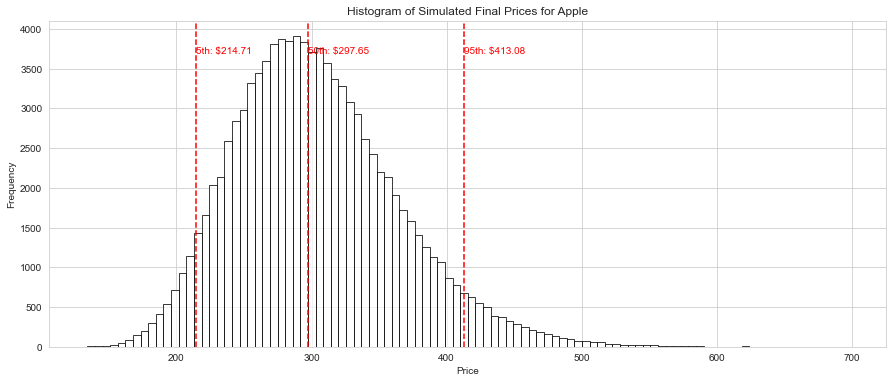

In [115]:
final_prices = simulated_prices[:, -1]

plt.figure(figsize=(15, 6))
sns.histplot(final_prices, bins=100, alpha=0.7, edgecolor='black',color='white')

quantiles = [0.05, 0.5, 0.95]
quantile_values = np.quantile(final_prices, quantiles)

for quantile, value in zip(quantiles, quantile_values):
    plt.axvline(x=value, color='red', linestyle='--')
    plt.text(value, plt.ylim()[1] * 0.9, f'{int(quantile*100)}th: ${value:.2f}', color='red')

# Title and labels
plt.title(f'Histogram of Simulated Final Prices for Apple')
plt.xlabel('Price')
plt.ylabel('Frequency')

#### the safest stock to invest in from this alone

In [116]:
closing_prices[-1]

192.02418518066406

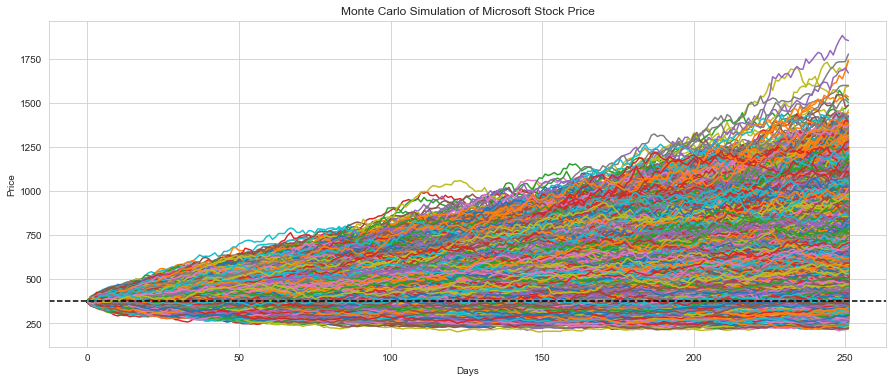

In [117]:
mean_return = return_df.MSFT.mean()
std_return = return_df.MSFT.std()

closing_prices = closing_df.MSFT


# Step 4: Simulate Future Prices
# Parameters
num_simulations = 100000
num_days = 252  # Number of trading days in a year

# Simulation
simulated_prices = np.zeros((num_simulations, num_days))
simulated_prices[:, 0] = closing_prices[-1]

for i in range(1, num_days):
    random_returns = np.random.normal(mean_return, std_return, num_simulations)
    simulated_prices[:, i] = simulated_prices[:, i-1] * (1 + random_returns)
    
plt.figure(figsize=(15, 6))
plt.plot(simulated_prices.T)

plt.axhline(y=closing_prices[-1], color='black', linestyle='--')


plt.title(f'Monte Carlo Simulation of Microsoft Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')



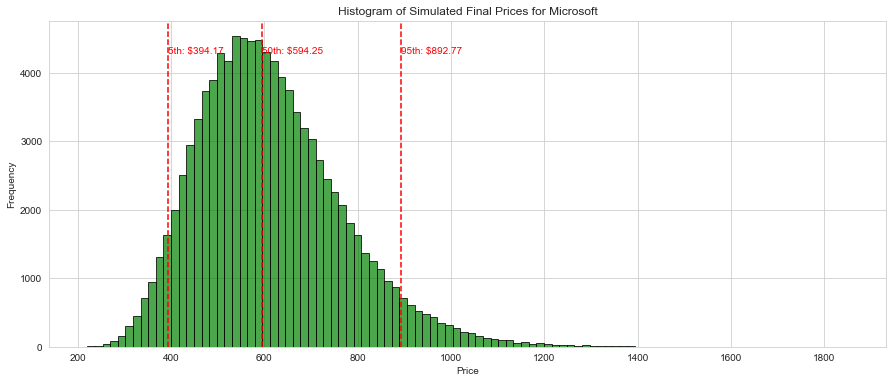

In [119]:
final_prices = simulated_prices[:, -1]

plt.figure(figsize=(15, 6))
sns.histplot(final_prices, bins=100, alpha=0.7, edgecolor='black',color='green')

quantiles = [0.05, 0.5, 0.95]
quantile_values = np.quantile(final_prices, quantiles)

for quantile, value in zip(quantiles, quantile_values):
    plt.axvline(x=value, color='red', linestyle='--')
    plt.text(value, plt.ylim()[1] * 0.9, f'{int(quantile*100)}th: ${value:.2f}', color='red')

# Title and labels
plt.title(f'Histogram of Simulated Final Prices for Microsoft')
plt.xlabel('Price')
plt.ylabel('Frequency')


In [118]:
closing_prices[-1]

374.6700744628906

In [ ]:
############################################################################################################################
#### In this stock data analysis project, we analyzed data for GOOG, AMZN, AAPL, and MSFT. We calculated and ###############
#### visualized moving averages, then analyzed return profit using percentage change on closing prices. Several ############
#### plots revealed the highest correlation between GOOG and AMZN. Finally, we employed Monte Carlo simulation to ##########
#### predict future stock prices for all the analyzed stocks. ##############################################################
############################################################################################################################
